In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the datasets
shift_df = pd.read_csv('shifts.csv')
hcp_df = pd.read_csv('hcps.csv')

In [3]:
shift_df.head()

,id,hcp_id,hcf_id,agent_type,charge,created_at,shift_start,shift_type,is_cancelled,is_verified
0,5f18adbb6145d4001773f69f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/17,am,True,False
1,5f18ade019ed420017bb14c3,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/24,am,True,False
2,5f18adeb19ed420017bb14c6,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/31,am,True,False
3,5f18adf43d5e0b0017498604,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,42.0,07/22,09/07,am,True,False
4,5f18ae003d5e0b001749860f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,09/14,am,True,False


In [4]:
shift_df['shift_start'].unique().tolist()

['08/17',
 '08/24',
 '08/31',
 '09/07',
 '09/14',
 '09/21',
 '09/28',
 '10/05',
 '10/12',
 '10/19',
 '10/26',
 '07/22',
 '07/30',
 '09/13',
 '09/19',
 '10/02',
 '10/08',
 '10/14',
 '10/20',
 '11/01',
 '07/21',
 '07/23',
 '09/16',
 '09/26',
 '09/27',
 '09/12',
 '09/05',
 '08/08',
 '08/10',
 '08/15',
 '08/16',
 '08/18',
 '08/20',
 '08/19',
 '09/25',
 '10/01',
 '08/21',
 '08/22',
 '09/06',
 '09/03',
 '09/04',
 '09/20',
 '09/08',
 '09/17',
 '09/22',
 '08/29',
 '08/25',
 '08/30',
 '09/09',
 '07/17',
 '07/25',
 '09/15',
 '09/29',
 '09/11',
 '09/18',
 '09/02',
 '10/03',
 '10/04',
 '08/23',
 '08/12',
 '08/05',
 '08/13',
 '08/26',
 '08/09',
 '07/11',
 '07/19',
 '08/02',
 '08/04',
 '08/06',
 '08/27',
 '08/28',
 '09/10',
 '09/23',
 '09/30',
 '07/07',
 '07/13',
 '08/03',
 '08/07',
 '08/14',
 '07/03',
 '07/09',
 '07/05',
 '07/20',
 '07/27',
 '07/31',
 '07/10',
 '07/14',
 '07/18',
 '07/28',
 '07/16',
 '07/24',
 '07/29',
 '08/01',
 '08/11',
 '07/08',
 '09/01',
 '07/15',
 '07/01',
 '07/04',
 '07/06',


In [5]:
hcp_df.head()

,id,stage,created_at,last_worked,completed_shifts,attendance_percentage
0,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
1,5b6dda6d6ce3150014cc74c6,PROBATION,06/23,09/14,32,76
2,5b6e37ff625376001402de0f,ENROLLED,06/03,09/16,188,84
3,5bb684553e5353000430e587,ENROLLED,03/05,09/20,198,96
4,5be4c820a3acae0004af0833,ENROLLED,NaN,09/21,39,80


In [6]:
#POST-SUBMISSION
hcp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     200 non-null    object
 1   stage                  200 non-null    object
 2   created_at             195 non-null    object
 3   last_worked            197 non-null    object
 4   completed_shifts       200 non-null    int64 
 5   attendance_percentage  200 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


In [7]:
#Sounds like we can join the datasets on hcp_id from the shifts dataframe to the id from the hcps dataframe 
#Before we do that, let's look at the shape of both dataframes
shift_df.shape
#There are 3682 rows, representing 3682 unique shifts

(3682, 10)

In [8]:
hcp_df.shape
#There are 200 healthcare professionals (hcps)

(200, 6)

In [9]:
#How many unique hcps are in the shifts dataset? This could inform on the join in the event of duplicates or missing hcp data
len(shift_df['hcp_id'].unique())

200

In [10]:
#Ok, it is the same unique number of hcps from both datasets. Let's join the tables with an inner join. 
merged_shifts_df = pd.merge(shift_df, hcp_df, left_on = 'hcp_id', right_on = 'id', how = 'inner')
merged_shifts_df.head(10)

,id_x,hcp_id,hcf_id,agent_type,charge,created_at_x,shift_start,shift_type,is_cancelled,is_verified,id_y,stage,created_at_y,last_worked,completed_shifts,attendance_percentage
0,5f18adbb6145d4001773f69f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/17,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
1,5f18ade019ed420017bb14c3,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/24,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
2,5f18adeb19ed420017bb14c6,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/31,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
3,5f18adf43d5e0b0017498604,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,42.0,07/22,09/07,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
4,5f18ae003d5e0b001749860f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,09/14,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
5,5f18ae0b3d5e0b0017498612,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,09/21,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
6,5f18ae156145d4001773f6b2,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,09/28,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
7,5f18ae1f19ed420017bb14da,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,10/05,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
8,5f18ae273d5e0b0017498617,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,10/12,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
9,5f18ae3619ed420017bb14e2,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,10/19,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71


In [11]:
#Need to do some cleaning of the column names to specify which dataframe they originally came from 
merged_shifts_df.rename(columns = {'id_x': 'shift_id', 'created_at_x': 'shift_created_at', 'created_at_y': 'hcp_created_at'}, inplace = True)
merged_shifts_df

,shift_id,hcp_id,hcf_id,agent_type,charge,shift_created_at,shift_start,shift_type,is_cancelled,is_verified,id_y,stage,hcp_created_at,last_worked,completed_shifts,attendance_percentage
0,5f18adbb6145d4001773f69f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/17,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
1,5f18ade019ed420017bb14c3,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/24,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
2,5f18adeb19ed420017bb14c6,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/31,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
3,5f18adf43d5e0b0017498604,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,42.0,07/22,09/07,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
4,5f18ae003d5e0b001749860f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,09/14,am,True,False,5b5635b34afc8f0014a40433,ENROLLED,NaN,06/29,177,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,5f5a8a6ab97ca100165a1d0b,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/10,09/21,am,False,False,5f592fac99d71b00161c33c7,PROBATION,09/09,09/20,4,44
3678,5f68f8d0a39ebc00160edfa9,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/21,09/26,am,False,False,5f592fac99d71b00161c33c7,PROBATION,09/09,09/20,4,44
3679,5f68f8db861401001614c52d,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/21,09/27,am,False,False,5f592fac99d71b00161c33c7,PROBATION,09/09,09/20,4,44
3680,5f68f8ee861401001614c533,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/21,09/28,am,False,False,5f592fac99d71b00161c33c7,PROBATION,09/09,09/20,4,44


In [12]:
#id_y is the same as hcp_id, so I removed the id_y column
merged_shifts_df.drop(columns = ['id_y'], inplace = True)

In [13]:
merged_shifts_df

,shift_id,hcp_id,hcf_id,agent_type,charge,shift_created_at,shift_start,shift_type,is_cancelled,is_verified,stage,hcp_created_at,last_worked,completed_shifts,attendance_percentage
0,5f18adbb6145d4001773f69f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/17,am,True,False,ENROLLED,NaN,06/29,177,71
1,5f18ade019ed420017bb14c3,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/24,am,True,False,ENROLLED,NaN,06/29,177,71
2,5f18adeb19ed420017bb14c6,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/31,am,True,False,ENROLLED,NaN,06/29,177,71
3,5f18adf43d5e0b0017498604,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,42.0,07/22,09/07,am,True,False,ENROLLED,NaN,06/29,177,71
4,5f18ae003d5e0b001749860f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,09/14,am,True,False,ENROLLED,NaN,06/29,177,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,5f5a8a6ab97ca100165a1d0b,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/10,09/21,am,False,False,PROBATION,09/09,09/20,4,44
3678,5f68f8d0a39ebc00160edfa9,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/21,09/26,am,False,False,PROBATION,09/09,09/20,4,44
3679,5f68f8db861401001614c52d,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/21,09/27,am,False,False,PROBATION,09/09,09/20,4,44
3680,5f68f8ee861401001614c533,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/21,09/28,am,False,False,PROBATION,09/09,09/20,4,44


In [14]:
#any columns with null values?
merged_shifts_df.isnull().any()

shift_id                 False
hcp_id                   False
hcf_id                   False
agent_type               False
charge                   False
shift_created_at         False
shift_start              False
shift_type               False
is_cancelled             False
is_verified              False
stage                    False
hcp_created_at            True
last_worked               True
completed_shifts         False
attendance_percentage    False
dtype: bool

In [15]:
#check data types
merged_shifts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3682 entries, 0 to 3681
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   shift_id               3682 non-null   object 
 1   hcp_id                 3682 non-null   object 
 2   hcf_id                 3682 non-null   object 
 3   agent_type             3682 non-null   object 
 4   charge                 3682 non-null   float64
 5   shift_created_at       3682 non-null   object 
 6   shift_start            3682 non-null   object 
 7   shift_type             3682 non-null   object 
 8   is_cancelled           3682 non-null   bool   
 9   is_verified            3682 non-null   bool   
 10  stage                  3682 non-null   object 
 11  hcp_created_at         3611 non-null   object 
 12  last_worked            3672 non-null   object 
 13  completed_shifts       3682 non-null   int64  
 14  attendance_percentage  3682 non-null   int64  
dtypes: b

In [16]:
###SHIFTS###

Text(0.5, 0, 'Agent Type')

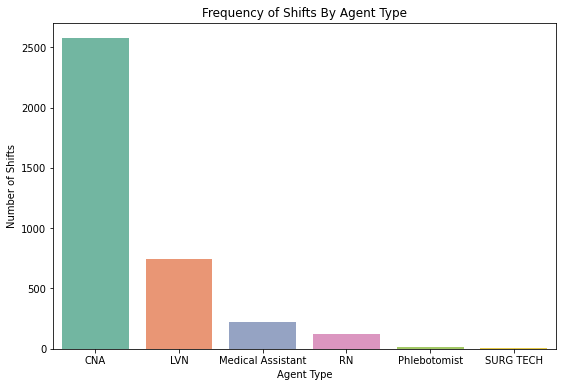

In [17]:
#What is the number of shifts by agent types?
plt.figure(figsize = (9, 6)) 
plt.title('Frequency of Shifts By Agent Type')
ax = sns.countplot(x='agent_type', data = merged_shifts_df, palette = 'Set2', order = merged_shifts_df['agent_type'].value_counts().index)
plt.ylabel('Number of Shifts')
plt.xlabel('Agent Type')

In [18]:
#The value counts match the number of shifts by agent type in the above bar graph
merged_shifts_df['agent_type'].value_counts()

CNA                  2575
LVN                   743
Medical Assistant     221
RN                    125
Phlebotomist           15
SURG TECH               3
Name: agent_type, dtype: int64

In [19]:
#Percentage of agent_type by shift
merged_shifts_df['agent_type'].value_counts(normalize = True)

CNA                  0.699348
LVN                  0.201793
Medical Assistant    0.060022
RN                   0.033949
Phlebotomist         0.004074
SURG TECH            0.000815
Name: agent_type, dtype: float64

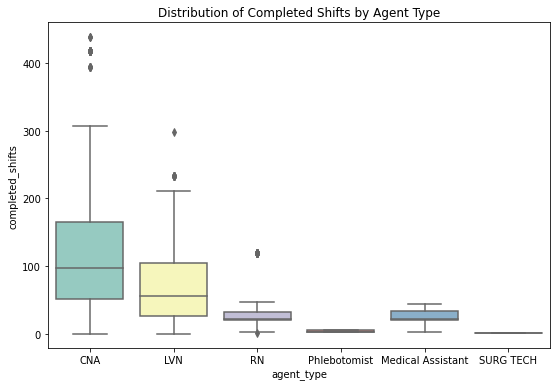

In [20]:
#POST-SUBMISSION
plt.figure(figsize = (9, 6)) 
plt.title('Distribution of Completed Shifts by Agent Type')
ax = sns.boxplot(x = merged_shifts_df['agent_type'], y = merged_shifts_df['completed_shifts'], orient = 'v', palette = 'Set3')
#This isn't completely accurate, because there are duplicates based on how many hcps had shifts

In [21]:
merged_shifts_df.groupby('agent_type')['completed_shifts'].describe().reset_index()

,agent_type,count,mean,std,min,25%,50%,75%,max
0,CNA,2575.0,118.207379,86.500359,0.0,51.0,97.0,165.0,439.0
1,LVN,743.0,72.469717,60.314663,0.0,26.0,55.0,104.0,298.0
2,Medical Assistant,221.0,24.981900,11.456623,2.0,20.0,22.0,33.0,44.0
3,Phlebotomist,15.0,3.000000,1.463850,2.0,2.0,2.0,5.0,5.0
4,RN,125.0,40.800000,41.530595,1.0,20.0,21.0,32.0,120.0
5,SURG TECH,3.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [22]:
#Looking at the breakdown of is_cancelled shifts
merged_shifts_df['is_cancelled'].value_counts()

False    3152
True      530
Name: is_cancelled, dtype: int64

In [23]:
#Percentage of cancelled shifts 
merged_shifts_df['is_cancelled'].value_counts(normalize = True)

False    0.856056
True     0.143944
Name: is_cancelled, dtype: float64

In [24]:
#Breakdown of verified as work shifts
merged_shifts_df['is_verified'].value_counts()

True     2739
False     943
Name: is_verified, dtype: int64

In [25]:
#Percentage of verified as work shifts
merged_shifts_df['is_verified'].value_counts(normalize = True)

True     0.743889
False    0.256111
Name: is_verified, dtype: float64

In [26]:
#Looking at all instances for is_cancelled and is_verified boolean values
pd.crosstab(merged_shifts_df['is_cancelled'], merged_shifts_df['is_verified'], rownames = ['Cancellation'], colnames = ['Verified'])

Verified,False,True
Cancellation,,
False,419,2733
True,524,6


In [27]:
#POST-SUBMISSION
cancelled_shifts = merged_shifts_df[merged_shifts_df['is_cancelled'] == True]
cancelled_shifts

,shift_id,hcp_id,hcf_id,agent_type,charge,shift_created_at,shift_start,shift_type,is_cancelled,is_verified,stage,hcp_created_at,last_worked,completed_shifts,attendance_percentage
0,5f18adbb6145d4001773f69f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/17,am,True,False,ENROLLED,NaN,06/29,177,71
1,5f18ade019ed420017bb14c3,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/24,am,True,False,ENROLLED,NaN,06/29,177,71
2,5f18adeb19ed420017bb14c6,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/31,am,True,False,ENROLLED,NaN,06/29,177,71
3,5f18adf43d5e0b0017498604,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,42.0,07/22,09/07,am,True,False,ENROLLED,NaN,06/29,177,71
4,5f18ae003d5e0b001749860f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,09/14,am,True,False,ENROLLED,NaN,06/29,177,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,5f4edb478981250016578c4d,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,32.5,09/01,09/14,custom,True,False,ENROLLED,08/22,09/17,21,100
3604,5f4edb498981250016578c4f,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,32.5,09/01,09/15,custom,True,False,ENROLLED,08/22,09/17,21,100
3605,5f4edb4c8981250016578c51,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,32.5,09/01,09/22,custom,True,False,ENROLLED,08/22,09/17,21,100
3638,5f527d4a3d95610016e0a181,5f4a9a63c682c20016d922cf,5c26bd11ad766900169578e8,CNA,27.0,09/04,09/19,am,True,False,PROBATION,08/29,09/17,1,50


In [28]:
#POST-SUBMISSION
hcp_cancelled_shifts = cancelled_shifts.groupby(['hcp_id'])['hcp_id'].agg(['count']).reset_index().sort_values(by = 'count', ascending = False)
hcp_cancelled_shifts

,hcp_id,count
49,5db0b2adf6755600165955c0,36
59,5e1ccb1b27ff480016e90c79,23
16,5cf573381648900016c41377,22
57,5e011e30bede8f00164fe168,17
96,5ee16233cb45ea0017ce84fd,16
...,...,...
89,5ecc074ca451e60017ab19d8,1
5,5befa1dc4665f80004b96dda,1
43,5da5dc83122a4a00160a4919,1
73,5e7a902dcd0bd800164e571f,1


In [29]:
cancelled_shifts_hcp_id = hcp_cancelled_shifts['hcp_id'].values.tolist()
cancelled_shifts_count = hcp_cancelled_shifts['count'].values.tolist()

In [30]:
cancelled_shift_dict = {cancelled_shifts_hcp_id[i]: cancelled_shifts_count[i] for i in range(len(cancelled_shifts_hcp_id))}
cancelled_shift_dict

{'5db0b2adf6755600165955c0': 36,
 '5e1ccb1b27ff480016e90c79': 23,
 '5cf573381648900016c41377': 22,
 '5e011e30bede8f00164fe168': 17,
 '5ee16233cb45ea0017ce84fd': 16,
 '5d28eef55045480015867762': 15,
 '5bebb6bf19a24e000424b1a0': 13,
 '5ecdfb9e36d19b0017a0383c': 13,
 '5de5696b6f225700160087de': 12,
 '5f0ba84b76624300173bd296': 12,
 '5d01527457d52f0016322b0e': 11,
 '5d71801cc69aaa0016cc1c8a': 11,
 '5b5635b34afc8f0014a40433': 11,
 '5e266450ec61d50016d258e0': 10,
 '5d379bdc824c9700160c5e2d': 10,
 '5e8e0c13a71dcb001628320a': 9,
 '5cb74b27ddf7e90016ed77ff': 9,
 '5deeb348e9c40c001669bde7': 8,
 '5cab785c49428200167d2a9f': 8,
 '5d640d8e4f18340016761522': 7,
 '5d7ff55f9b671100167efe5f': 7,
 '5d139e3e5295380016a3ab1f': 7,
 '5cddecdb5805700016c44f04': 7,
 '5e7d21886169ea001654f51c': 6,
 '5c93e1c5ecf19d0016cfc94f': 6,
 '5eb3485231f5eb00171ff4af': 6,
 '5ebdd92a433dd50017919ef6': 6,
 '5e865322678ecd0016ebef06': 6,
 '5d2e5e1f988b510015f24dae': 5,
 '5ee01f11e1289b00170008e7': 5,
 '5e6060da51121b0016802c7

In [31]:
#Dataframe that isolates the shifts that have not cancelled and not verified as worked 
unfulfilled_non_cancelled_shifts = merged_shifts_df[(merged_shifts_df['is_cancelled'] == False) & (merged_shifts_df['is_verified'] == False)]
unfulfilled_non_cancelled_shifts

,shift_id,hcp_id,hcf_id,agent_type,charge,shift_created_at,shift_start,shift_type,is_cancelled,is_verified,stage,hcp_created_at,last_worked,completed_shifts,attendance_percentage
16,5f6009db3f190e001656402b,5b6dda6d6ce3150014cc74c6,5e8dce39ee2690001638ce46,LVN,51.0,09/15,10/02,noc,False,False,PROBATION,06/23,09/14,32,76
17,5f6009e63f190e001656402f,5b6dda6d6ce3150014cc74c6,5e8dce39ee2690001638ce46,LVN,51.0,09/15,10/08,noc,False,False,PROBATION,06/23,09/14,32,76
18,5f6009ed3f190e0016564032,5b6dda6d6ce3150014cc74c6,5e8dce39ee2690001638ce46,LVN,51.0,09/15,10/14,noc,False,False,PROBATION,06/23,09/14,32,76
19,5f6009f33f190e0016564035,5b6dda6d6ce3150014cc74c6,5e8dce39ee2690001638ce46,LVN,51.0,09/15,10/20,noc,False,False,PROBATION,06/23,09/14,32,76
20,5f6009f83f190e001656403c,5b6dda6d6ce3150014cc74c6,5e8dce39ee2690001638ce46,LVN,53.0,09/15,10/26,noc,False,False,PROBATION,06/23,09/14,32,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,5f5a8a6ab97ca100165a1d0b,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/10,09/21,am,False,False,PROBATION,09/09,09/20,4,44
3678,5f68f8d0a39ebc00160edfa9,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/21,09/26,am,False,False,PROBATION,09/09,09/20,4,44
3679,5f68f8db861401001614c52d,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/21,09/27,am,False,False,PROBATION,09/09,09/20,4,44
3680,5f68f8ee861401001614c533,5f592fac99d71b00161c33c7,5e8f6513fb94ef0016a870a3,CNA,28.0,09/21,09/28,am,False,False,PROBATION,09/09,09/20,4,44


In [32]:
# 73 healthcare professionals who did not work at their shift when it was NOT cancelled by either them or the facility
#It is ordered with the most number of absentee shifts by healthcare professional
unfulfilled_shifts_by_hcp = unfulfilled_non_cancelled_shifts.groupby(['hcp_id'])['hcp_id'].agg(['count']).reset_index().sort_values(by = 'count', ascending = False)
unfulfilled_shifts_by_hcp.rename(columns = {'count': 'Absent Shifts'}, inplace = True)
unfulfilled_shifts_by_hcp

,hcp_id,Absent Shifts
26,5db8b6bbf0a5760016f16f96,27
32,5deeb348e9c40c001669bde7,18
19,5d640d8e4f18340016761522,14
46,5e8b8f15fef72700164816c5,13
68,5f4060e8baf316001694241e,11
...,...,...
42,5e7a902dcd0bd800164e571f,1
41,5e6060da51121b0016802c70,1
34,5e0e729cab3f870016076dc2,1
20,5d71671ec69aaa0016cbef52,1


In [33]:
#POST-SUBMISSION
hcp_id_absent_list = unfulfilled_shifts_by_hcp['hcp_id'].tolist()
hcp_id_absent_list

['5db8b6bbf0a5760016f16f96',
 '5deeb348e9c40c001669bde7',
 '5d640d8e4f18340016761522',
 '5e8b8f15fef72700164816c5',
 '5f4060e8baf316001694241e',
 '5daf355a2dbf300016b68f98',
 '5e5981e7b765ef00167fec90',
 '5bebb6bf19a24e000424b1a0',
 '5ecdfb9e36d19b0017a0383c',
 '5de9814124128d00163bee65',
 '5d1b7ac0c330a20016c438df',
 '5e909db55aa9780034c5fb5e',
 '5e011e30bede8f00164fe168',
 '5de5696b6f225700160087de',
 '5daf6e712dbf300016ba50ab',
 '5d9cbd102425e70016a90c80',
 '5f592fac99d71b00161c33c7',
 '5ddc8012e39e230016c568cc',
 '5eaf38b196ee8400168702f5',
 '5ee16233cb45ea0017ce84fd',
 '5f1873de19ed420017bb0bc0',
 '5e7d21886169ea001654f51c',
 '5d379bdc824c9700160c5e2d',
 '5d027d555147290016b769ff',
 '5dd458d4c4f6e9001604d01b',
 '5e865322678ecd0016ebef06',
 '5eb3485231f5eb00171ff4af',
 '5ec44ad29e8eb4001752ab4d',
 '5efcc6908be2570017d3e29e',
 '5b6dda6d6ce3150014cc74c6',
 '5cf96114cf35aa0016854f8b',
 '5d2e5e1f988b510015f24dae',
 '5c66ed1aaa68330016b5f6b6',
 '5f57d0776ed44c001613b1d0',
 '5f4bbd29dcab

In [34]:
#POST-SUBMISSION
atd_pct = []
for i in hcp_id_absent_list:
    atd_pct.append(hcp_df[hcp_df['id'] == i]['attendance_percentage'].values[0])
atd_pct

[31,
 89,
 82,
 91,
 100,
 57,
 94,
 87,
 75,
 72,
 94,
 65,
 84,
 78,
 91,
 84,
 44,
 94,
 69,
 93,
 100,
 90,
 82,
 97,
 90,
 100,
 69,
 70,
 76,
 76,
 38,
 91,
 78,
 100,
 100,
 92,
 97,
 82,
 61,
 91,
 100,
 77,
 100,
 92,
 97,
 80,
 89,
 95,
 50,
 87,
 0,
 96,
 100,
 92,
 86,
 84,
 84,
 33,
 80,
 83,
 89,
 100,
 84,
 90,
 23,
 76,
 100,
 50,
 71,
 0,
 67,
 75,
 33]

In [35]:
#POST-SUBMISSION
#Cross-checking with one value
hcp_df[hcp_df['id'] == '5f4060e8baf316001694241e']

,id,stage,created_at,last_worked,completed_shifts,attendance_percentage
194,5f4060e8baf316001694241e,ENROLLED,08/22,09/17,21,100


In [36]:
#POST-SUBMISSION
unfulfilled_shifts_by_hcp['Attendance_percentage'] = atd_pct
unfulfilled_shifts_by_hcp

,hcp_id,Absent Shifts,Attendance_percentage
26,5db8b6bbf0a5760016f16f96,27,31
32,5deeb348e9c40c001669bde7,18,89
19,5d640d8e4f18340016761522,14,82
46,5e8b8f15fef72700164816c5,13,91
68,5f4060e8baf316001694241e,11,100
...,...,...,...
42,5e7a902dcd0bd800164e571f,1,71
41,5e6060da51121b0016802c70,1,0
34,5e0e729cab3f870016076dc2,1,67
20,5d71671ec69aaa0016cbef52,1,75


In [37]:
#Top healthcare facilities with the most number of absent shifts 
unfulfilled_shifts_by_hcf = unfulfilled_non_cancelled_shifts.groupby(['hcf_id'])['hcf_id'].agg(['count']).reset_index().sort_values(by = 'count', ascending = False)
unfulfilled_shifts_by_hcf.rename(columns = {'count': 'Absent Shifts'}, inplace = True)
unfulfilled_shifts_by_hcf

,hcf_id,Absent Shifts
25,5eebe1ec00957c0017a41c49,71
0,5b70ed73e318270014cd6bee,57
9,5cb9f07135163900163f532c,43
17,5e21d6201fa1af0016d39a5c,22
21,5e8f18c7c2980b00164326a9,19
18,5e3b1adad2123d00162e7a56,18
8,5c8837b3e7874100161f38da,16
7,5c539532fe63b800166ddb2d,14
30,5f3d5962cb28700016dff1a7,13
23,5ebb1786087804001750a4d8,12


In [141]:
unfulfilled_shifts_by_hcf.describe()

,Absent Shifts,Attendance_percentage_avg
count,34.000000,34.000000
mean,12.323529,81.129412
std,15.497254,9.488734
min,1.000000,53.200000
25%,4.250000,75.675000
50%,6.500000,81.950000
75%,12.750000,86.025000
max,71.000000,100.000000


In [38]:
counts_hcf = merged_shifts_df.groupby('hcf_id')['hcf_id'].agg(['count']).reset_index().sort_values(by = 'count', ascending = False)
counts_hcf

,hcf_id,count
50,5eebe1ec00957c0017a41c49,401
21,5d446a8d8fbe1800166d8312,381
0,5b70ed73e318270014cd6bee,256
58,5f1869b56145d4001773ec6a,218
17,5cb9f07135163900163f532c,191
...,...,...
33,5e5e85ea43a2390016e3d65c,2
18,5ced854f08563500167fc5cf,2
7,5bf30fdfb1959c000400fa72,1
9,5c104cc93a1cdc0004681521,1


In [39]:
hcf_id_total_list = counts_hcf['hcf_id'].values.tolist()
hcf_id_total_count_list = counts_hcf['count'].values.tolist()
hcf_shift_dict = {hcf_id_total_list[i]: hcf_id_total_count_list[i] for i in range(len(hcf_id_total_list))}
hcf_shift_dict

{'5eebe1ec00957c0017a41c49': 401,
 '5d446a8d8fbe1800166d8312': 381,
 '5b70ed73e318270014cd6bee': 256,
 '5f1869b56145d4001773ec6a': 218,
 '5cb9f07135163900163f532c': 191,
 '5e3b1adad2123d00162e7a56': 137,
 '5d812d12b528420016181ecf': 127,
 '5e21d6201fa1af0016d39a5c': 124,
 '5f3d5962cb28700016dff1a7': 122,
 '5be0b0d2ba64030004d2117c': 106,
 '5c539532fe63b800166ddb2d': 99,
 '5bb380e8945fd200046cad4c': 91,
 '5e8f18c7c2980b00164326a9': 87,
 '5c831076a08cb800167af45d': 79,
 '5ebb1786087804001750a4d8': 77,
 '5c49f6a0a0ac9600043509e1': 72,
 '5c81813bbcbe6b00160a6b69': 66,
 '5df913b17106bf001602be38': 64,
 '5f360eac17ad7e0016b977c3': 64,
 '5c8837b3e7874100161f38da': 62,
 '5f0e758b95e18300175d5573': 61,
 '5f3a6ea070b0d80016601d89': 54,
 '5f305015f8d05400161fa931': 43,
 '5f109d17ba30e1001733ff95': 41,
 '5ebf1773a253570017a27da2': 40,
 '5e069a78b4551000167926ea': 40,
 '5d3f2859dde4300016924963': 36,
 '5ecc20d1a451e60017ab56f7': 32,
 '5c26bd11ad766900169578e8': 32,
 '5f2b29592891da00161c4ad9': 31,


In [40]:
#POST-SUBMISSION
hcf_id_absent_list = unfulfilled_shifts_by_hcf['hcf_id'].tolist()
hcf_id_absent_list

['5eebe1ec00957c0017a41c49',
 '5b70ed73e318270014cd6bee',
 '5cb9f07135163900163f532c',
 '5e21d6201fa1af0016d39a5c',
 '5e8f18c7c2980b00164326a9',
 '5e3b1adad2123d00162e7a56',
 '5c8837b3e7874100161f38da',
 '5c539532fe63b800166ddb2d',
 '5f3d5962cb28700016dff1a7',
 '5ebb1786087804001750a4d8',
 '5d3f2859dde4300016924963',
 '5f457bca7561c300165896f8',
 '5d812d12b528420016181ecf',
 '5f3a6ea070b0d80016601d89',
 '5f1869b56145d4001773ec6a',
 '5d1f3f99339f36001533f5bb',
 '5bb380e8945fd200046cad4c',
 '5e8dce39ee2690001638ce46',
 '5e8796bc097f640016e14589',
 '5c26bd11ad766900169578e8',
 '5f109d17ba30e1001733ff95',
 '5e8f6513fb94ef0016a870a3',
 '5f60c396ee55030016d67e75',
 '5c49f6a0a0ac9600043509e1',
 '5bce18de63e1a40004b3ddd4',
 '5e2119950d2c4000166d3995',
 '5f63c06a4c6e0a0016759a7e',
 '5ecc20d1a451e60017ab56f7',
 '5df913b17106bf001602be38',
 '5bd20a2c2f1b850004d0f55e',
 '5ced854f08563500167fc5cf',
 '5f2b29592891da00161c4ad9',
 '5e069a78b4551000167926ea',
 '5c0af282edde0b0004102048']

In [41]:
#POST-SUBMISSION
hcf_atd_pct = []
for i in hcf_id_absent_list:
    hcf_atd_pct.append(merged_shifts_df[merged_shifts_df['hcf_id'] == i]['attendance_percentage'].mean())
hcf_atd_pct

[84.70573566084788,
 67.2890625,
 86.20942408376963,
 89.64516129032258,
 73.96551724137932,
 82.52554744525547,
 77.66129032258064,
 82.46464646464646,
 79.64754098360656,
 81.35064935064935,
 69.13888888888889,
 82.71428571428571,
 87.44094488188976,
 96.0,
 94.62844036697248,
 83.94736842105263,
 73.53846153846153,
 80.80952380952381,
 76.8,
 68.0625,
 97.5609756097561,
 53.166666666666664,
 100.0,
 88.33333333333333,
 90.57142857142857,
 83.65,
 85.5,
 79.3125,
 74.75,
 72.0,
 83.0,
 79.93548387096774,
 76.925,
 75.33333333333333]

In [42]:
#POST-SUBMISSION
unfulfilled_shifts_by_hcf['Attendance_percentage_avg'] = hcf_atd_pct
unfulfilled_shifts_by_hcf['Attendance_percentage_avg'] = unfulfilled_shifts_by_hcf['Attendance_percentage_avg'].round(1)
unfulfilled_shifts_by_hcf

,hcf_id,Absent Shifts,Attendance_percentage_avg
25,5eebe1ec00957c0017a41c49,71,84.7
0,5b70ed73e318270014cd6bee,57,67.3
9,5cb9f07135163900163f532c,43,86.2
17,5e21d6201fa1af0016d39a5c,22,89.6
21,5e8f18c7c2980b00164326a9,19,74.0
18,5e3b1adad2123d00162e7a56,18,82.5
8,5c8837b3e7874100161f38da,16,77.7
7,5c539532fe63b800166ddb2d,14,82.5
30,5f3d5962cb28700016dff1a7,13,79.6
23,5ebb1786087804001750a4d8,12,81.4


In [142]:
hcf_list_id = unfulfilled_shifts_by_hcf['hcf_id'].values.tolist()
hcf_list_id

['5eebe1ec00957c0017a41c49',
 '5b70ed73e318270014cd6bee',
 '5cb9f07135163900163f532c',
 '5e21d6201fa1af0016d39a5c',
 '5e8f18c7c2980b00164326a9',
 '5e3b1adad2123d00162e7a56',
 '5c8837b3e7874100161f38da',
 '5c539532fe63b800166ddb2d',
 '5f3d5962cb28700016dff1a7',
 '5ebb1786087804001750a4d8',
 '5d3f2859dde4300016924963',
 '5f457bca7561c300165896f8',
 '5d812d12b528420016181ecf',
 '5f3a6ea070b0d80016601d89',
 '5f1869b56145d4001773ec6a',
 '5d1f3f99339f36001533f5bb',
 '5bb380e8945fd200046cad4c',
 '5e8dce39ee2690001638ce46',
 '5e8796bc097f640016e14589',
 '5c26bd11ad766900169578e8',
 '5f109d17ba30e1001733ff95',
 '5e8f6513fb94ef0016a870a3',
 '5f60c396ee55030016d67e75',
 '5c49f6a0a0ac9600043509e1',
 '5bce18de63e1a40004b3ddd4',
 '5e2119950d2c4000166d3995',
 '5f63c06a4c6e0a0016759a7e',
 '5ecc20d1a451e60017ab56f7',
 '5df913b17106bf001602be38',
 '5bd20a2c2f1b850004d0f55e',
 '5ced854f08563500167fc5cf',
 '5f2b29592891da00161c4ad9',
 '5e069a78b4551000167926ea',
 '5c0af282edde0b0004102048']

In [143]:
#POST_SUBMSSION
count_of_hcf_list = []
for i in hcf_list_id:
    count_of_hcf_list.append(hcf_shift_dict[i])
count_of_hcf_list  

[401,
 256,
 191,
 124,
 87,
 137,
 62,
 99,
 122,
 77,
 36,
 14,
 127,
 54,
 218,
 19,
 91,
 21,
 10,
 32,
 41,
 12,
 8,
 72,
 7,
 20,
 4,
 32,
 64,
 11,
 2,
 31,
 40,
 9]

In [150]:
unfulfilled_shifts_by_hcf['Number of Shifts'] = count_of_hcf_list
unfulfilled_shifts_by_hcf['pct_absent_shifts'] = ((unfulfilled_shifts_by_hcf['Absent Shifts'] / unfulfilled_shifts_by_hcf['Number of Shifts']) * 100.0).round(1)
#unfulfilled_shifts_by_hcf.sort_values(by = 'pct_absent_shifts', ascending = False)
unfulfilled_shifts_by_hcf

,hcf_id,Absent Shifts,Attendance_percentage_avg,Number of Shifts,pct_absent_shifts
25,5eebe1ec00957c0017a41c49,71,84.7,401,17.7
0,5b70ed73e318270014cd6bee,57,67.3,256,22.3
9,5cb9f07135163900163f532c,43,86.2,191,22.5
17,5e21d6201fa1af0016d39a5c,22,89.6,124,17.7
21,5e8f18c7c2980b00164326a9,19,74.0,87,21.8
18,5e3b1adad2123d00162e7a56,18,82.5,137,13.1
8,5c8837b3e7874100161f38da,16,77.7,62,25.8
7,5c539532fe63b800166ddb2d,14,82.5,99,14.1
30,5f3d5962cb28700016dff1a7,13,79.6,122,10.7
23,5ebb1786087804001750a4d8,12,81.4,77,15.6


In [147]:
unfulfilled_shifts_by_hcf.describe()

,Absent Shifts,Attendance_percentage_avg,Number of Shifts,pct_absent_shifts
count,34.000000,34.000000,34.000000,34.000000
mean,12.323529,81.129412,74.441176,27.570588
std,15.497254,9.488734,86.036001,25.122675
min,1.000000,53.200000,2.000000,2.500000
25%,4.250000,75.675000,15.250000,10.800000
50%,6.500000,81.950000,40.500000,18.100000
75%,12.750000,86.025000,97.000000,32.125000
max,71.000000,100.000000,401.000000,100.000000


Text(0.5, 0, 'Shift Type')

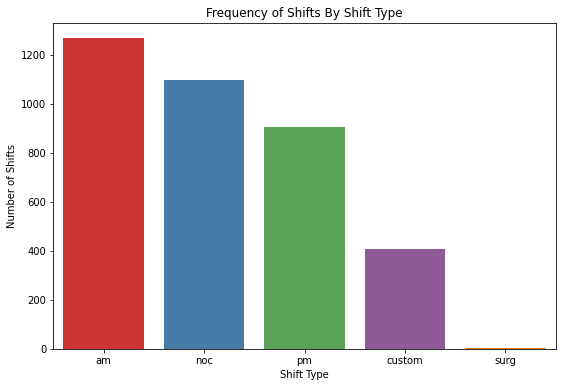

In [45]:
#Looking at the breakdown of shifts by shift type (ie. AM/NOC/PM)
plt.figure(figsize = (9, 6)) 
#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.title('Frequency of Shifts By Shift Type')
sns.countplot(x='shift_type', data = merged_shifts_df, palette = 'Set1', order = merged_shifts_df['shift_type'].value_counts().index)
plt.ylabel('Number of Shifts')
plt.xlabel('Shift Type')

In [46]:
#Using value_counts to get the number of shifts by shift_type that correspond to the bar graph
merged_shifts_df['shift_type'].value_counts()

am        1268
noc       1098
pm         904
custom     409
surg         3
Name: shift_type, dtype: int64

In [47]:
#Viewing the breakdown of shift type in percentage form
merged_shifts_df['shift_type'].value_counts(normalize = True)

am        0.344378
noc       0.298207
pm        0.245519
custom    0.111081
surg      0.000815
Name: shift_type, dtype: float64

In [48]:
#Re-examining the number of absent shifts by shift_type this time
unfulfilled_non_cancelled_shifts['shift_type'].value_counts()

am        164
noc       133
pm         90
custom     32
Name: shift_type, dtype: int64

In [49]:
#Percentage breakdown of absent shifts by shift type
unfulfilled_non_cancelled_shifts['shift_type'].value_counts(normalize = True)

am        0.391408
noc       0.317422
pm        0.214797
custom    0.076372
Name: shift_type, dtype: float64

In [50]:
###HEALTHCARE FACILITIES###

In [51]:
#How many unique facilities are there?
len(merged_shifts_df['hcf_id'].unique())

74

In [52]:
#Grouping the merged dataset by healthcare facilities and ordering by the highest number of shifts 
#The count is the same regardless of what column is used,
#because it is counting the number of rows per group (facility) which is shifts
hcf_info_df = merged_shifts_df.groupby(['hcf_id'])['charge'].agg(['count', 'mean']).reset_index()
hcf_info_df['mean'] = hcf_info_df['mean'].round(2)
hcf_info_df.rename(columns = {'count': 'Count of Shifts', 'mean': 'Average Charge'}, inplace = True)
hcf_info_df.sort_values(by = 'Count of Shifts', ascending = False)

,hcf_id,Count of Shifts,Average Charge
50,5eebe1ec00957c0017a41c49,401,37.75
21,5d446a8d8fbe1800166d8312,381,33.55
0,5b70ed73e318270014cd6bee,256,24.82
58,5f1869b56145d4001773ec6a,218,52.08
17,5cb9f07135163900163f532c,191,32.07
...,...,...,...
33,5e5e85ea43a2390016e3d65c,2,28.00
18,5ced854f08563500167fc5cf,2,30.00
7,5bf30fdfb1959c000400fa72,1,0.00
9,5c104cc93a1cdc0004681521,1,33.50


In [53]:
hcf_info_df['Count of Shifts'].describe()

count     74.000000
mean      49.756757
std       76.954676
min        1.000000
25%        8.250000
50%       18.500000
75%       63.500000
max      401.000000
Name: Count of Shifts, dtype: float64

In [54]:
IQR_shifts_per_hcf = hcf_info_df.quantile(.75) - hcf_info_df.quantile(.25)
IQR_shifts_per_hcf

Count of Shifts    55.2500
Average Charge     12.7125
dtype: float64

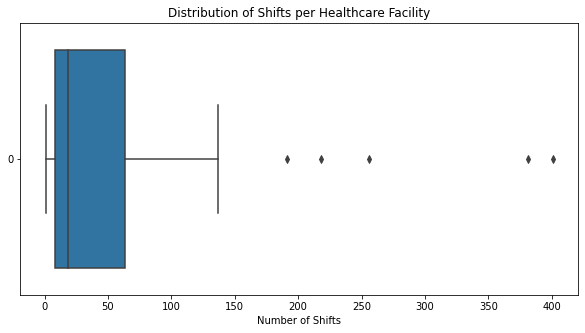

In [55]:
#The distribution of shifts per healthcare facility is heavily skewed to the right, influenced by outliers
plt.figure(figsize = (10, 5)) 
plt.title('Distribution of Shifts per Healthcare Facility')
plt.xlabel('Number of Shifts')
ax = sns.boxplot(data = hcf_info_df['Count of Shifts'], orient = 'h')
#Calculate IQR?

In [56]:
outlier_hcf = merged_shifts_df[merged_shifts_df['hcf_id'] == '5eebe1ec00957c0017a41c49']
outlier_hcf

,shift_id,hcp_id,hcf_id,agent_type,charge,shift_created_at,shift_start,shift_type,is_cancelled,is_verified,stage,hcp_created_at,last_worked,completed_shifts,attendance_percentage
83,5f28a2432e013300168bcb2f,5bebb6bf19a24e000424b1a0,5eebe1ec00957c0017a41c49,LVN,79.5,08/03,08/15,custom,False,True,ENROLLED,NaN,09/16,55,87
84,5f2c7f07108bee0016f4cd93,5bebb6bf19a24e000424b1a0,5eebe1ec00957c0017a41c49,LVN,53.0,08/06,08/15,am,False,True,ENROLLED,NaN,09/16,55,87
98,5f473b1e1df11f0016df90ca,5bebb6bf19a24e000424b1a0,5eebe1ec00957c0017a41c49,LVN,53.0,08/27,09/26,am,False,False,ENROLLED,NaN,09/16,55,87
99,5f473b20c0b6bd001607aaa2,5bebb6bf19a24e000424b1a0,5eebe1ec00957c0017a41c49,LVN,79.5,08/27,09/26,custom,False,False,ENROLLED,NaN,09/16,55,87
101,5f4db5dd0ac12c0016bc0761,5bebb6bf19a24e000424b1a0,5eebe1ec00957c0017a41c49,LVN,48.0,09/01,09/16,custom,False,True,ENROLLED,NaN,09/16,55,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,5f59390abec4a80016641244,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,34.0,09/09,09/13,custom,False,True,ENROLLED,08/22,09/17,21,100
3625,5f59391dbec4a80016641255,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,34.0,09/09,09/17,custom,False,True,ENROLLED,08/22,09/17,21,100
3626,5f59391fbec4a8001664125b,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,34.0,09/09,09/18,custom,False,False,ENROLLED,08/22,09/17,21,100
3627,5f593926bec4a80016641261,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,34.0,09/09,09/22,custom,False,False,ENROLLED,08/22,09/17,21,100


In [57]:
outlier_hcf['is_verified'].value_counts(normalize = True)

True     0.76808
False    0.23192
Name: is_verified, dtype: float64

In [58]:
###HEALTHCARE PROFESSIONALS###

In [59]:
#POST-SUBMISSION
hcp_grouped_df = merged_shifts_df.groupby(['hcp_id', 'agent_type','stage', 'completed_shifts', 'attendance_percentage'])['hcp_id'].agg(['count']).reset_index()
hcp_grouped_df.rename(columns= {'count' : 'Number of Shifts'}, inplace = True)
hcp_grouped_df

,hcp_id,agent_type,stage,completed_shifts,attendance_percentage,Number of Shifts
0,5b5635b34afc8f0014a40433,CNA,ENROLLED,177,71,11
1,5b6dda6d6ce3150014cc74c6,LVN,PROBATION,32,76,11
2,5b6e37ff625376001402de0f,CNA,ENROLLED,188,84,11
3,5bb684553e5353000430e587,CNA,ENROLLED,198,96,30
4,5be4c820a3acae0004af0833,CNA,ENROLLED,39,80,18
...,...,...,...,...,...,...
199,5f4803b6c0b6bd001607cb17,CNA,ENROLLED,8,89,8
200,5f4a9a63c682c20016d922cf,CNA,PROBATION,1,50,7
201,5f4bbd29dcab30001604da6a,Medical Assistant,ENROLLED,13,100,18
202,5f57d0776ed44c001613b1d0,Medical Assistant,ENROLLED,3,100,8


In [60]:
#POST-SUBMISSION
absent_shifts_hcp_id = unfulfilled_shifts_by_hcp['hcp_id'].values.tolist()
num_absent_shifts = unfulfilled_shifts_by_hcp['Absent Shifts'].values.tolist()
absent_shifts_hcp_id

['5db8b6bbf0a5760016f16f96',
 '5deeb348e9c40c001669bde7',
 '5d640d8e4f18340016761522',
 '5e8b8f15fef72700164816c5',
 '5f4060e8baf316001694241e',
 '5daf355a2dbf300016b68f98',
 '5e5981e7b765ef00167fec90',
 '5bebb6bf19a24e000424b1a0',
 '5ecdfb9e36d19b0017a0383c',
 '5de9814124128d00163bee65',
 '5d1b7ac0c330a20016c438df',
 '5e909db55aa9780034c5fb5e',
 '5e011e30bede8f00164fe168',
 '5de5696b6f225700160087de',
 '5daf6e712dbf300016ba50ab',
 '5d9cbd102425e70016a90c80',
 '5f592fac99d71b00161c33c7',
 '5ddc8012e39e230016c568cc',
 '5eaf38b196ee8400168702f5',
 '5ee16233cb45ea0017ce84fd',
 '5f1873de19ed420017bb0bc0',
 '5e7d21886169ea001654f51c',
 '5d379bdc824c9700160c5e2d',
 '5d027d555147290016b769ff',
 '5dd458d4c4f6e9001604d01b',
 '5e865322678ecd0016ebef06',
 '5eb3485231f5eb00171ff4af',
 '5ec44ad29e8eb4001752ab4d',
 '5efcc6908be2570017d3e29e',
 '5b6dda6d6ce3150014cc74c6',
 '5cf96114cf35aa0016854f8b',
 '5d2e5e1f988b510015f24dae',
 '5c66ed1aaa68330016b5f6b6',
 '5f57d0776ed44c001613b1d0',
 '5f4bbd29dcab

In [61]:
#POST-SUBMISSION
absent_shift_dict = {absent_shifts_hcp_id[i]: num_absent_shifts[i] for i in range(len(absent_shifts_hcp_id))}
absent_shift_dict

{'5db8b6bbf0a5760016f16f96': 27,
 '5deeb348e9c40c001669bde7': 18,
 '5d640d8e4f18340016761522': 14,
 '5e8b8f15fef72700164816c5': 13,
 '5f4060e8baf316001694241e': 11,
 '5daf355a2dbf300016b68f98': 11,
 '5e5981e7b765ef00167fec90': 10,
 '5bebb6bf19a24e000424b1a0': 10,
 '5ecdfb9e36d19b0017a0383c': 10,
 '5de9814124128d00163bee65': 10,
 '5d1b7ac0c330a20016c438df': 10,
 '5e909db55aa9780034c5fb5e': 10,
 '5e011e30bede8f00164fe168': 10,
 '5de5696b6f225700160087de': 8,
 '5daf6e712dbf300016ba50ab': 8,
 '5d9cbd102425e70016a90c80': 8,
 '5f592fac99d71b00161c33c7': 8,
 '5ddc8012e39e230016c568cc': 8,
 '5eaf38b196ee8400168702f5': 8,
 '5ee16233cb45ea0017ce84fd': 8,
 '5f1873de19ed420017bb0bc0': 8,
 '5e7d21886169ea001654f51c': 7,
 '5d379bdc824c9700160c5e2d': 7,
 '5d027d555147290016b769ff': 7,
 '5dd458d4c4f6e9001604d01b': 7,
 '5e865322678ecd0016ebef06': 6,
 '5eb3485231f5eb00171ff4af': 6,
 '5ec44ad29e8eb4001752ab4d': 6,
 '5efcc6908be2570017d3e29e': 6,
 '5b6dda6d6ce3150014cc74c6': 6,
 '5cf96114cf35aa0016854f8b'

In [62]:
#POST-SUBMISSION
hcp_grouped_df['Absent_Shifts'] = 0

In [63]:
absent_shifts_list = []
for x in hcp_grouped_df['hcp_id']:
    if x in absent_shifts_hcp_id:
        absent_shifts_list.append(absent_shift_dict[x])
    else:
        absent_shifts_list.append(0)
absent_shifts_list

[0,
 6,
 3,
 3,
 4,
 10,
 0,
 0,
 1,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 6,
 0,
 7,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 5,
 0,
 0,
 7,
 0,
 4,
 0,
 0,
 4,
 2,
 0,
 0,
 0,
 14,
 0,
 0,
 0,
 1,
 0,
 0,
 8,
 4,
 4,
 0,
 11,
 8,
 0,
 0,
 0,
 27,
 0,
 0,
 1,
 7,
 8,
 8,
 10,
 0,
 18,
 10,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 3,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 10,
 0,
 1,
 0,
 0,
 0,
 1,
 4,
 0,
 7,
 0,
 6,
 13,
 0,
 0,
 10,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 8,
 0,
 0,
 4,
 6,
 0,
 5,
 5,
 0,
 0,
 0,
 0,
 3,
 6,
 3,
 0,
 0,
 0,
 10,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 5,
 1,
 3,
 11,
 0,
 4,
 5,
 5,
 8]

In [64]:
#hcp_grouped_df['hcp_id'] = hcp_grouped_df['hcp_id'].apply(put_absent_shifts)
hcp_grouped_df['Absent_Shifts'] = absent_shifts_list

In [65]:
#POST-SUBMISSION
hcp_grouped_df.rename(columns = {'completed_shifts': 'total_completed_shifts'}, inplace = True)

In [66]:
#POST-SUBMISSION
cancelled_shifts_list = []
for x in hcp_grouped_df['hcp_id']:
    if x in cancelled_shifts_hcp_id:
        cancelled_shifts_list.append(cancelled_shift_dict[x])
    else:
        cancelled_shifts_list.append(0)
cancelled_shifts_list

[11,
 3,
 1,
 4,
 0,
 13,
 1,
 0,
 0,
 0,
 4,
 1,
 0,
 6,
 2,
 3,
 0,
 8,
 1,
 0,
 9,
 4,
 0,
 0,
 0,
 0,
 0,
 7,
 22,
 0,
 11,
 1,
 0,
 3,
 0,
 2,
 1,
 1,
 7,
 0,
 1,
 3,
 3,
 1,
 2,
 0,
 5,
 3,
 15,
 3,
 0,
 5,
 0,
 2,
 10,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 7,
 0,
 1,
 0,
 0,
 11,
 7,
 0,
 1,
 0,
 4,
 4,
 4,
 2,
 1,
 36,
 1,
 1,
 3,
 2,
 0,
 0,
 12,
 5,
 0,
 8,
 17,
 0,
 0,
 3,
 23,
 2,
 0,
 1,
 10,
 0,
 4,
 4,
 0,
 3,
 0,
 3,
 1,
 3,
 2,
 2,
 5,
 3,
 0,
 0,
 1,
 5,
 3,
 6,
 0,
 6,
 0,
 9,
 3,
 1,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 6,
 0,
 0,
 0,
 0,
 0,
 1,
 6,
 0,
 0,
 3,
 0,
 1,
 0,
 13,
 4,
 0,
 3,
 3,
 0,
 0,
 5,
 0,
 1,
 16,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 5,
 0,
 0,
 2,
 0,
 4,
 0,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 4,
 0,
 5,
 0,
 2,
 0,
 0,
 0]

In [67]:
#POST-SUBMISSION
hcp_grouped_df['Cancelled_Shifts'] = cancelled_shifts_list
hcp_grouped_df['Period_completed_shifts'] = hcp_grouped_df['Number of Shifts'] - (hcp_grouped_df['Absent_Shifts']+ hcp_grouped_df['Cancelled_Shifts'])
hcp_grouped_df['Period_attendance_percentage'] = ((hcp_grouped_df['Period_completed_shifts'] / hcp_grouped_df['Number of Shifts']) * 100.0).round(1)
hcp_grouped_df

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
0,5b5635b34afc8f0014a40433,CNA,ENROLLED,177,71,11,0,11,0,0.0
1,5b6dda6d6ce3150014cc74c6,LVN,PROBATION,32,76,11,6,3,2,18.2
2,5b6e37ff625376001402de0f,CNA,ENROLLED,188,84,11,3,1,7,63.6
3,5bb684553e5353000430e587,CNA,ENROLLED,198,96,30,3,4,23,76.7
4,5be4c820a3acae0004af0833,CNA,ENROLLED,39,80,18,4,0,14,77.8
...,...,...,...,...,...,...,...,...,...,...
199,5f4803b6c0b6bd001607cb17,CNA,ENROLLED,8,89,8,0,0,8,100.0
200,5f4a9a63c682c20016d922cf,CNA,PROBATION,1,50,7,4,2,1,14.3
201,5f4bbd29dcab30001604da6a,Medical Assistant,ENROLLED,13,100,18,5,0,13,72.2
202,5f57d0776ed44c001613b1d0,Medical Assistant,ENROLLED,3,100,8,5,0,3,37.5


In [68]:
#POST-SUBMISSION
#Period_attend_pct was mistakenly inflated when not accounting for cancelled shifts
hcp_grouped_df.describe()

,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,65.176471,78.823529,18.049020,2.078431,2.598039,13.372549,74.006863
std,82.574154,21.737762,19.954321,3.787941,4.557806,15.320820,27.700822
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,69.750000,3.000000,0.000000,0.000000,2.000000,61.875000
50%,32.000000,84.000000,11.000000,0.000000,1.000000,7.000000,80.000000
75%,91.000000,95.250000,27.000000,3.250000,3.000000,20.250000,100.000000
max,439.000000,100.000000,111.000000,27.000000,36.000000,85.000000,100.000000


In [151]:
hcp_grouped_df['Period_completed_shifts'].sum()

2728

In [69]:
zero_overall = hcp_grouped_df.sort_values(by = 'attendance_percentage', ascending = True).head(10)
zero_overall

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
197,5f3b0e442232520016d29155,LVN,ENROLLED,0,0,3,3,0,0,0.0
78,5daf8d2d2dbf300016bd677d,CNA,ENROLLED,0,0,1,0,1,0,0.0
110,5e6060da51121b0016802c70,LVN,ENROLLED,0,0,6,1,5,0,0.0
25,5cd1dc3dbc5ca90016a07edd,CNA,PROBATION,4,11,1,0,0,1,100.0
81,5dbb3b186b7c230016ab798a,CNA,Deactivated,3,16,1,0,1,0,0.0
151,5ecf06709b82320017268ea2,CNA,PROBATION,3,23,8,1,4,3,37.5
80,5db8b6bbf0a5760016f16f96,CNA,PROBATION,49,31,44,27,1,16,36.4
142,5ebc90840a9ec500170aa85c,LVN,ENROLLED,2,33,1,0,1,0,0.0
125,5e9761e390bb3c0016dead1b,CNA,ENROLLED,1,33,7,2,4,1,14.3
36,5d0bb767f7c5c60016e382f5,LVN,ENROLLED,1,33,4,1,1,2,50.0


In [70]:
below_q1 = hcp_grouped_df[hcp_grouped_df['attendance_percentage'] < 69]
below_q1

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
9,5c5df91016395e0016a28355,CNA,ENROLLED,3,60,1,0,0,1,100.0
14,5c93fd7becf19d0016d59f35,CNA,ENROLLED,41,59,6,0,2,4,66.7
18,5cae7a50bdfc6b0016a1f2f4,CNA,ENROLLED,3,38,1,0,1,0,0.0
20,5cb74b27ddf7e90016ed77ff,LVN,ENROLLED,14,37,19,0,9,10,52.6
24,5cc8a7a83af07c001624fc3c,CNA,ENROLLED,70,55,20,0,0,20,100.0
25,5cd1dc3dbc5ca90016a07edd,CNA,PROBATION,4,11,1,0,0,1,100.0
29,5cf96114cf35aa0016854f8b,CNA,PROBATION,285,38,12,6,0,6,50.0
36,5d0bb767f7c5c60016e382f5,LVN,ENROLLED,1,33,4,1,1,2,50.0
38,5d139e3e5295380016a3ab1f,CNA,PROBATION,41,47,19,0,7,12,63.2
45,5d237fa140ba5c001528ef09,CNA,ENROLLED,108,57,11,0,0,11,100.0


In [71]:
sorted_q1 = below_q1.sort_values(by = ['attendance_percentage', 'Period_attendance_percentage'], ascending = [True, True])
sorted_q1

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
78,5daf8d2d2dbf300016bd677d,CNA,ENROLLED,0,0,1,0,1,0,0.0
110,5e6060da51121b0016802c70,LVN,ENROLLED,0,0,6,1,5,0,0.0
197,5f3b0e442232520016d29155,LVN,ENROLLED,0,0,3,3,0,0,0.0
25,5cd1dc3dbc5ca90016a07edd,CNA,PROBATION,4,11,1,0,0,1,100.0
81,5dbb3b186b7c230016ab798a,CNA,Deactivated,3,16,1,0,1,0,0.0
151,5ecf06709b82320017268ea2,CNA,PROBATION,3,23,8,1,4,3,37.5
80,5db8b6bbf0a5760016f16f96,CNA,PROBATION,49,31,44,27,1,16,36.4
142,5ebc90840a9ec500170aa85c,LVN,ENROLLED,2,33,1,0,1,0,0.0
125,5e9761e390bb3c0016dead1b,CNA,ENROLLED,1,33,7,2,4,1,14.3
36,5d0bb767f7c5c60016e382f5,LVN,ENROLLED,1,33,4,1,1,2,50.0


In [72]:
sorted_q1_df = sorted_q1[['hcp_id', 'agent_type', 'stage', 'total_completed_shifts', 'attendance_percentage', 'Number of Shifts', 'Period_completed_shifts', 'Period_attendance_percentage']]
sorted_q1_df.rename(columns={'attendance_percentage': 'attend_pct','Period_completed_shifts': '6_mo_completed_shifts', 'Period_attendance_percentage': '6_mo_attend_pct'})

,hcp_id,agent_type,stage,total_completed_shifts,attend_pct,Number of Shifts,6_mo_completed_shifts,6_mo_attend_pct
78,5daf8d2d2dbf300016bd677d,CNA,ENROLLED,0,0,1,0,0.0
110,5e6060da51121b0016802c70,LVN,ENROLLED,0,0,6,0,0.0
197,5f3b0e442232520016d29155,LVN,ENROLLED,0,0,3,0,0.0
25,5cd1dc3dbc5ca90016a07edd,CNA,PROBATION,4,11,1,1,100.0
81,5dbb3b186b7c230016ab798a,CNA,Deactivated,3,16,1,0,0.0
151,5ecf06709b82320017268ea2,CNA,PROBATION,3,23,8,3,37.5
80,5db8b6bbf0a5760016f16f96,CNA,PROBATION,49,31,44,16,36.4
142,5ebc90840a9ec500170aa85c,LVN,ENROLLED,2,33,1,0,0.0
125,5e9761e390bb3c0016dead1b,CNA,ENROLLED,1,33,7,1,14.3
36,5d0bb767f7c5c60016e382f5,LVN,ENROLLED,1,33,4,2,50.0


In [73]:
below_q1.describe()

,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,36.437500,46.395833,10.416667,1.687500,2.083333,6.645833,63.193750
std,65.565269,18.339284,12.522037,4.548351,2.923371,9.051836,35.607921
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,37.750000,1.000000,0.000000,0.000000,1.000000,37.225000
50%,5.000000,50.000000,5.500000,0.000000,1.000000,2.000000,66.700000
75%,41.750000,59.250000,15.250000,1.000000,3.000000,10.250000,100.000000
max,285.000000,68.000000,56.000000,27.000000,12.000000,41.000000,100.000000


In [74]:
no_current_shifts = hcp_grouped_df[hcp_grouped_df['Period_completed_shifts'] == 0]
no_current_shifts

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
0,5b5635b34afc8f0014a40433,CNA,ENROLLED,177,71,11,0,11,0,0.0
6,5befa1dc4665f80004b96dda,LVN,ENROLLED,298,85,1,0,1,0,0.0
18,5cae7a50bdfc6b0016a1f2f4,CNA,ENROLLED,3,38,1,0,1,0,0.0
78,5daf8d2d2dbf300016bd677d,CNA,ENROLLED,0,0,1,0,1,0,0.0
81,5dbb3b186b7c230016ab798a,CNA,Deactivated,3,16,1,0,1,0,0.0
106,5e4ee2143baece00165ecb7e,CNA,PROBATION,105,73,1,0,1,0,0.0
110,5e6060da51121b0016802c70,LVN,ENROLLED,0,0,6,1,5,0,0.0
142,5ebc90840a9ec500170aa85c,LVN,ENROLLED,2,33,1,0,1,0,0.0
197,5f3b0e442232520016d29155,LVN,ENROLLED,0,0,3,3,0,0,0.0


In [75]:
zero_6_mo = hcp_grouped_df.sort_values(by = 'Period_attendance_percentage', ascending = True)
zero_6_mo.head(10)

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
0,5b5635b34afc8f0014a40433,CNA,ENROLLED,177,71,11,0,11,0,0.0
18,5cae7a50bdfc6b0016a1f2f4,CNA,ENROLLED,3,38,1,0,1,0,0.0
78,5daf8d2d2dbf300016bd677d,CNA,ENROLLED,0,0,1,0,1,0,0.0
197,5f3b0e442232520016d29155,LVN,ENROLLED,0,0,3,3,0,0,0.0
81,5dbb3b186b7c230016ab798a,CNA,Deactivated,3,16,1,0,1,0,0.0
106,5e4ee2143baece00165ecb7e,CNA,PROBATION,105,73,1,0,1,0,0.0
6,5befa1dc4665f80004b96dda,LVN,ENROLLED,298,85,1,0,1,0,0.0
110,5e6060da51121b0016802c70,LVN,ENROLLED,0,0,6,1,5,0,0.0
142,5ebc90840a9ec500170aa85c,LVN,ENROLLED,2,33,1,0,1,0,0.0
121,5e8e0c13a71dcb001628320a,RN,ENROLLED,20,71,10,0,9,1,10.0


In [76]:
no_current_shifts = hcp_grouped_df[hcp_grouped_df['Period_completed_shifts'] == 0]
no_current_shifts

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
0,5b5635b34afc8f0014a40433,CNA,ENROLLED,177,71,11,0,11,0,0.0
6,5befa1dc4665f80004b96dda,LVN,ENROLLED,298,85,1,0,1,0,0.0
18,5cae7a50bdfc6b0016a1f2f4,CNA,ENROLLED,3,38,1,0,1,0,0.0
78,5daf8d2d2dbf300016bd677d,CNA,ENROLLED,0,0,1,0,1,0,0.0
81,5dbb3b186b7c230016ab798a,CNA,Deactivated,3,16,1,0,1,0,0.0
106,5e4ee2143baece00165ecb7e,CNA,PROBATION,105,73,1,0,1,0,0.0
110,5e6060da51121b0016802c70,LVN,ENROLLED,0,0,6,1,5,0,0.0
142,5ebc90840a9ec500170aa85c,LVN,ENROLLED,2,33,1,0,1,0,0.0
197,5f3b0e442232520016d29155,LVN,ENROLLED,0,0,3,3,0,0,0.0


In [77]:
no_any_shifts = hcp_grouped_df[hcp_grouped_df['total_completed_shifts'] == 0]
no_any_shifts

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
78,5daf8d2d2dbf300016bd677d,CNA,ENROLLED,0,0,1,0,1,0,0.0
110,5e6060da51121b0016802c70,LVN,ENROLLED,0,0,6,1,5,0,0.0
197,5f3b0e442232520016d29155,LVN,ENROLLED,0,0,3,3,0,0,0.0


In [78]:
absent_workers = hcp_grouped_df.sort_values(by = ['Absent_Shifts', 'Period_attendance_percentage'], ascending = [False, True])
absent_workers_df = absent_workers[['hcp_id','Number of Shifts','Absent_Shifts', 'Period_attendance_percentage', 'attendance_percentage']]
absent_workers_df.rename(columns = {'Period_attendance_percentage': '6_mo_attend_pct', 'attendance_percentage':'attend_pct'})

,hcp_id,Number of Shifts,Absent_Shifts,6_mo_attend_pct,attend_pct
80,5db8b6bbf0a5760016f16f96,44,27,36.4,31
89,5deeb348e9c40c001669bde7,111,18,76.6,89
64,5d640d8e4f18340016761522,56,14,62.5,82
120,5e8b8f15fef72700164816c5,74,13,82.4,91
198,5f4060e8baf316001694241e,37,11,56.8,100
...,...,...,...,...,...
183,5f0f6e2c3f455100171b6b09,2,0,100.0,50
189,5f26e2e417719c001603fecf,1,0,100.0,67
190,5f284a132e013300168b95c8,11,0,100.0,100
191,5f29d6568dd9710016adc302,24,0,100.0,100


In [79]:
cancelled_workers = hcp_grouped_df.sort_values(by = ['Cancelled_Shifts', 'Period_attendance_percentage'], ascending = [False, True])
cancelled_workers_df = cancelled_workers[['hcp_id','Number of Shifts', 'Cancelled_Shifts', 'Period_attendance_percentage', 'attendance_percentage']]

In [80]:
cancelled_workers_df.rename(columns = {'Period_attendance_percentage':'6_mo_attend_pct', 'attendance_percentage': 'attend_pct'})

,hcp_id,Number of Shifts,Cancelled_Shifts,6_mo_attend_pct,attend_pct
79,5db0b2adf6755600165955c0,67,36,46.3,83
94,5e1ccb1b27ff480016e90c79,82,23,69.5,89
28,5cf573381648900016c41377,52,22,51.9,86
90,5e011e30bede8f00164fe168,75,17,64.0,84
160,5ee16233cb45ea0017ce84fd,64,16,62.5,93
...,...,...,...,...,...
183,5f0f6e2c3f455100171b6b09,2,0,100.0,50
189,5f26e2e417719c001603fecf,1,0,100.0,67
190,5f284a132e013300168b95c8,11,0,100.0,100
191,5f29d6568dd9710016adc302,24,0,100.0,100


In [81]:
hcp_grouped_df.sort_values(by = ['Period_attendance_percentage'], ascending = True)

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
0,5b5635b34afc8f0014a40433,CNA,ENROLLED,177,71,11,0,11,0,0.0
18,5cae7a50bdfc6b0016a1f2f4,CNA,ENROLLED,3,38,1,0,1,0,0.0
78,5daf8d2d2dbf300016bd677d,CNA,ENROLLED,0,0,1,0,1,0,0.0
197,5f3b0e442232520016d29155,LVN,ENROLLED,0,0,3,3,0,0,0.0
81,5dbb3b186b7c230016ab798a,CNA,Deactivated,3,16,1,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
12,5c8bf92b6b5b82001686efbd,CNA,ENROLLED,394,95,8,0,0,8,100.0
113,5e79345569545700160b3b87,CNA,ENROLLED,1,100,1,0,0,1,100.0
104,5e3c7e51e91454001639eb2a,CNA,ENROLLED,24,65,1,0,0,1,100.0
96,5e1d18c927ff480016e926b6,CNA,ENROLLED,12,80,2,0,0,2,100.0


In [82]:
#formating df describe for ppt
hcp_grouped = hcp_grouped_df.describe()
hcp_grouped_describe_df = hcp_grouped[['total_completed_shifts', 'attendance_percentage','Period_completed_shifts', 'Period_attendance_percentage']]
hcp_grouped_describe_df.rename(columns = {'attendance_percentage': 'attend_pct', 'Period_completed_shifts': '6_mo_completed_shifts', 'Period_attendance_percentage': '6_mo_attend_pct'}).round(1)

,total_completed_shifts,attend_pct,6_mo_completed_shifts,6_mo_attend_pct
count,204.0,204.0,204.0,204.0
mean,65.2,78.8,13.4,74.0
std,82.6,21.7,15.3,27.7
min,0.0,0.0,0.0,0.0
25%,7.0,69.8,2.0,61.9
50%,32.0,84.0,7.0,80.0
75%,91.0,95.2,20.2,100.0
max,439.0,100.0,85.0,100.0


In [83]:
max_shifts = hcp_grouped_df.sort_values(by = ['total_completed_shifts','Period_attendance_percentage'], ascending = False)
max_shift_df = max_shifts[['hcp_id', 'total_completed_shifts', 'attendance_percentage','Period_completed_shifts', 'Period_attendance_percentage']]
max_shift_df

,hcp_id,total_completed_shifts,attendance_percentage,Period_completed_shifts,Period_attendance_percentage
39,5d150d327b4d2a0016363548,439,98,3,100.0
11,5c882dd984e2b900160efd63,419,94,26,96.3
12,5c8bf92b6b5b82001686efbd,394,95,8,100.0
10,5c66ed1aaa68330016b5f6b6,307,78,30,76.9
6,5befa1dc4665f80004b96dda,298,85,0,0.0
...,...,...,...,...,...
125,5e9761e390bb3c0016dead1b,1,33,1,14.3
200,5f4a9a63c682c20016d922cf,1,50,1,14.3
78,5daf8d2d2dbf300016bd677d,0,0,0,0.0
110,5e6060da51121b0016802c70,0,0,0,0.0


In [84]:
max_shift_df.rename(columns = {'attendance_percentage': 'attend_pct', 'Period_completed_shifts': '6_mo_completed_shifts', 'Period_attendance_percentage': '6_mo_attend_pct'})

,hcp_id,total_completed_shifts,attend_pct,6_mo_completed_shifts,6_mo_attend_pct
39,5d150d327b4d2a0016363548,439,98,3,100.0
11,5c882dd984e2b900160efd63,419,94,26,96.3
12,5c8bf92b6b5b82001686efbd,394,95,8,100.0
10,5c66ed1aaa68330016b5f6b6,307,78,30,76.9
6,5befa1dc4665f80004b96dda,298,85,0,0.0
...,...,...,...,...,...
125,5e9761e390bb3c0016dead1b,1,33,1,14.3
200,5f4a9a63c682c20016d922cf,1,50,1,14.3
78,5daf8d2d2dbf300016bd677d,0,0,0,0.0
110,5e6060da51121b0016802c70,0,0,0,0.0


In [85]:
period_shift = hcp_grouped_df.sort_values(by = ['Number of Shifts','Period_attendance_percentage'], ascending = False).head(10)
period_shift_df = period_shift[['hcp_id', 'total_completed_shifts', 'attendance_percentage','Period_completed_shifts', 'Period_attendance_percentage']]

In [86]:
period_shift_df.rename(columns = {'attendance_percentage': 'attend_pct', 'Period_completed_shifts': '6_mo_completed_shifts', 'Period_attendance_percentage': '6_mo_attend_pct'})

,hcp_id,total_completed_shifts,attend_pct,6_mo_completed_shifts,6_mo_attend_pct
89,5deeb348e9c40c001669bde7,153,89,85,76.6
150,5ecdfb9e36d19b0017a0383c,104,75,59,72.0
94,5e1ccb1b27ff480016e90c79,76,89,57,69.5
90,5e011e30bede8f00164fe168,183,84,48,64.0
31,5d027d555147290016b769ff,290,97,66,89.2
120,5e8b8f15fef72700164816c5,114,91,61,82.4
48,5d28eef55045480015867762,165,91,52,72.2
79,5db0b2adf6755600165955c0,198,83,31,46.3
71,5d9cbd102425e70016a90c80,259,84,57,87.7
160,5ee16233cb45ea0017ce84fd,51,93,40,62.5


In [87]:
hcp_grouped_df[hcp_grouped_df['attendance_percentage'] == hcp_grouped_df['Period_attendance_percentage']]['hcp_id'].count()

29

In [88]:
hcp_grouped_df[hcp_grouped_df['attendance_percentage'] != hcp_grouped_df['Period_attendance_percentage']]['hcp_id'].count()

175

In [89]:
#POST-SUBMISSION
#For anomaly on the worker who had 11 absent shifts and 100 overall attendance %
shift_df[shift_df['hcp_id'] == '5f4060e8baf316001694241e']

,id,hcp_id,hcf_id,agent_type,charge,created_at,shift_start,shift_type,is_cancelled,is_verified
3592,5f247971821c460016b8776d,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,68.0,07/31,09/01,noc,False,True
3593,5f3806732e355a00164ba6c5,5f4060e8baf316001694241e,5c8837b3e7874100161f38da,RN,62.0,08/15,09/21,noc,False,False
3594,5f4d815cd621a000165c7c43,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,68.0,08/31,09/08,noc,False,True
3595,5f4d8163cd6ff10016938f78,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,68.0,08/31,09/15,noc,False,True
3596,5f4d8167cd6ff10016938f7b,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,68.0,08/31,09/16,noc,False,True
3597,5f4d816ccd6ff10016938f7e,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,68.0,08/31,09/23,noc,False,False
3598,5f4d8171cd6ff10016938f81,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,70.0,08/31,09/28,noc,False,False
3599,5f4ed8528981250016578b84,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,34.0,09/01,08/31,custom,False,True
3600,5f4eda188981250016578bf7,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,90.0,09/01,09/07,noc,False,True
3601,5f4edb3fb7eb520016634f8d,5f4060e8baf316001694241e,5eebe1ec00957c0017a41c49,RN,32.5,09/01,09/06,custom,True,False


In [90]:
#POST-SUBMISSION
hcp_grouped_df[hcp_grouped_df['hcp_id'] == '5f4060e8baf316001694241e']

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
198,5f4060e8baf316001694241e,RN,ENROLLED,21,100,37,11,5,21,56.8


In [91]:
#POST-SUBMISSION
hcp_df[hcp_df['id'] == '5f4060e8baf316001694241e']

,id,stage,created_at,last_worked,completed_shifts,attendance_percentage
194,5f4060e8baf316001694241e,ENROLLED,08/22,09/17,21,100


In [92]:
#POST-SUBMISSION
#This worker had 11 shifts, but they were cancelled, which makes sense 
shift_df[shift_df['hcp_id'] == '5b5635b34afc8f0014a40433']

,id,hcp_id,hcf_id,agent_type,charge,created_at,shift_start,shift_type,is_cancelled,is_verified
0,5f18adbb6145d4001773f69f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/17,am,True,False
1,5f18ade019ed420017bb14c3,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/24,am,True,False
2,5f18adeb19ed420017bb14c6,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,08/31,am,True,False
3,5f18adf43d5e0b0017498604,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,42.0,07/22,09/07,am,True,False
4,5f18ae003d5e0b001749860f,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,09/14,am,True,False
5,5f18ae0b3d5e0b0017498612,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,09/21,am,True,False
6,5f18ae156145d4001773f6b2,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,09/28,am,True,False
7,5f18ae1f19ed420017bb14da,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,10/05,am,True,False
8,5f18ae273d5e0b0017498617,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,10/12,am,True,False
9,5f18ae3619ed420017bb14e2,5b5635b34afc8f0014a40433,5e6662c827dbec0016767584,CNA,28.0,07/22,10/19,am,True,False


In [93]:
#POST-SUBMISSION
#Cross-checking 
hcp_grouped_df[hcp_grouped_df['hcp_id'] == '5b5635b34afc8f0014a40433']

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
0,5b5635b34afc8f0014a40433,CNA,ENROLLED,177,71,11,0,11,0,0.0


In [94]:
#POST-SUBMISSION
#Cross-check again from shift df
shift_df[shift_df['hcp_id'] == '5e7a902dcd0bd800164e571f']

,id,hcp_id,hcf_id,agent_type,charge,created_at,shift_start,shift_type,is_cancelled,is_verified
2394,5f405fb610790800167ecf7d,5e7a902dcd0bd800164e571f,5f3d5962cb28700016dff1a7,LVN,65.0,08/21,08/26,noc,True,False
2395,5f4ed555b7eb520016634c66,5e7a902dcd0bd800164e571f,5cb9f07135163900163f532c,LVN,50.0,09/01,09/08,noc,False,True
2396,5f580ddd5684fc001618d20a,5e7a902dcd0bd800164e571f,5cb9f07135163900163f532c,LVN,50.0,09/08,09/22,noc,False,False


In [95]:
#POST-SUBMISSION
#Aggregated from hcp grouped df
hcp_grouped_df[hcp_grouped_df['hcp_id'] == '5e7a902dcd0bd800164e571f']

,hcp_id,agent_type,stage,total_completed_shifts,attendance_percentage,Number of Shifts,Absent_Shifts,Cancelled_Shifts,Period_completed_shifts,Period_attendance_percentage
114,5e7a902dcd0bd800164e571f,LVN,ENROLLED,5,71,3,1,1,1,33.3


In [96]:
#POST-SUBMISSION
hcp_certain_cols = hcp_grouped_df[['hcp_id', 'attendance_percentage', 'Period_attendance_percentage']]
hcp_certain_cols

,hcp_id,attendance_percentage,Period_attendance_percentage
0,5b5635b34afc8f0014a40433,71,0.0
1,5b6dda6d6ce3150014cc74c6,76,18.2
2,5b6e37ff625376001402de0f,84,63.6
3,5bb684553e5353000430e587,96,76.7
4,5be4c820a3acae0004af0833,80,77.8
...,...,...,...
199,5f4803b6c0b6bd001607cb17,89,100.0
200,5f4a9a63c682c20016d922cf,50,14.3
201,5f4bbd29dcab30001604da6a,100,72.2
202,5f57d0776ed44c001613b1d0,100,37.5


In [97]:
#POST-SUBMISSION
melted_df = pd.melt(hcp_certain_cols, id_vars = ['hcp_id'], value_vars = ['attendance_percentage', 'Period_attendance_percentage'])
melted_df

,hcp_id,variable,value
0,5b5635b34afc8f0014a40433,attendance_percentage,71.0
1,5b6dda6d6ce3150014cc74c6,attendance_percentage,76.0
2,5b6e37ff625376001402de0f,attendance_percentage,84.0
3,5bb684553e5353000430e587,attendance_percentage,96.0
4,5be4c820a3acae0004af0833,attendance_percentage,80.0
...,...,...,...
403,5f4803b6c0b6bd001607cb17,Period_attendance_percentage,100.0
404,5f4a9a63c682c20016d922cf,Period_attendance_percentage,14.3
405,5f4bbd29dcab30001604da6a,Period_attendance_percentage,72.2
406,5f57d0776ed44c001613b1d0,Period_attendance_percentage,37.5


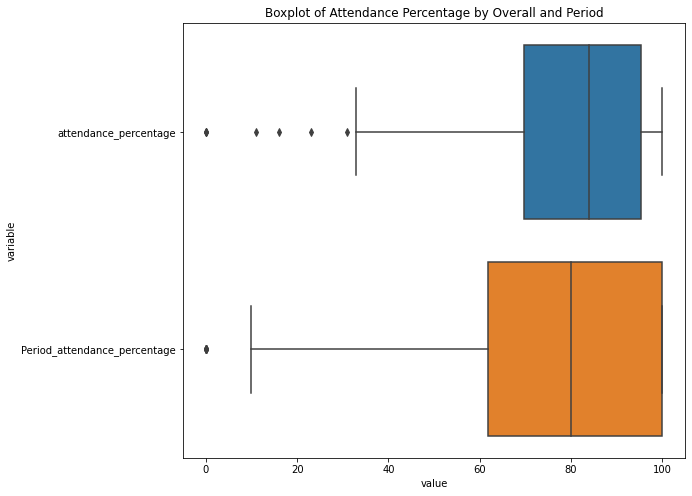

In [98]:
#POST-SUBMISSION
plt.figure(figsize = (9, 8)) 
plt.title('Boxplot of Attendance Percentage by Overall and Period')
ax = sns.boxplot(y = melted_df['variable'], x = melted_df['value'], orient = 'h')

In [99]:
#POST-SUBMISSION
hcp_grouped_df.groupby(['agent_type', 'stage']).agg({'attendance_percentage': 'mean', 'total_completed_shifts': 'sum', 'Period_completed_shifts': 'sum', 'Period_attendance_percentage': 'mean'})

attendance_percentage  total_completed_shifts  \
agent_type        stage                                                        
CNA               Deactivated              65.375000                     930   
                  ENROLLED                 79.652174                    6643   
                  PROBATION                65.181818                    2173   
                  SUSPENDED                80.500000                     338   
LVN               Deactivated              86.000000                     211   
                  ENROLLED                 74.790698                    2120   
                  PROBATION                77.571429                     370   
Medical Assistant ENROLLED                 92.857143                     136   
                  ONBOARDING               94.750000                      70   
Phlebotomist      ENROLLED                100.000000                       7   
                  ONBOARDING              100.000000                       8   
RN                ENROLLED                 96.363636                     289   
SURG TECH         ENROLLED                100.000000                       1   

                               Period_completed_shifts  \
agent_type        stage                                  
CNA               Deactivated                       77   
                  ENROLLED                        1369   
                  PROBATION                        419   
                  SUSPENDED                         49   
LVN               Deactivated                        3   
                  ENROLLED                         430   
                  PROBATION                         81   
Medical Assistant ENROLLED                         129   
                  ONBOARDING                        70   
Phlebotomist      ENROLLED                           7   
                  ONBOARDING                         8   
RN                ENROLLED                          85   
SURG TECH         ENROLLED                           1   

                               Period_attendance_percentage  
agent_type        stage                                      
CNA               Deactivated                     81.762500  
                  ENROLLED                        76.282609  
                  PROBATION                       64.768182  
                  SUSPENDED                       90.400000  
LVN               Deactivated                     50.000000  
                  ENROLLED                        67.086047  
                  PROBATION                       67.728571  
Medical Assistant ENROLLED                        84.214286  
                  ONBOARDING                      95.375000  
Phlebotomist      ENROLLED                       100.000000  
                  ONBOARDING                     100.000000  
RN                ENROLLED                        73.318182  
SURG TECH         ENROLLED                        33.300000

In [100]:
#Grouping the merged dataset by hcp_id and other related columns with count being the number of shifts
hcp_demographics_df = merged_shifts_df.groupby(['hcp_id', 'agent_type','stage', 'completed_shifts', 'attendance_percentage'])['agent_type'].agg(['count']).reset_index()
hcp_demographics_df.rename(columns= {'count' : 'Number of Shifts'}, inplace = True)
hcp_demographics_df

,hcp_id,agent_type,stage,completed_shifts,attendance_percentage,Number of Shifts
0,5b5635b34afc8f0014a40433,CNA,ENROLLED,177,71,11
1,5b6dda6d6ce3150014cc74c6,LVN,PROBATION,32,76,11
2,5b6e37ff625376001402de0f,CNA,ENROLLED,188,84,11
3,5bb684553e5353000430e587,CNA,ENROLLED,198,96,30
4,5be4c820a3acae0004af0833,CNA,ENROLLED,39,80,18
...,...,...,...,...,...,...
199,5f4803b6c0b6bd001607cb17,CNA,ENROLLED,8,89,8
200,5f4a9a63c682c20016d922cf,CNA,PROBATION,1,50,7
201,5f4bbd29dcab30001604da6a,Medical Assistant,ENROLLED,13,100,18
202,5f57d0776ed44c001613b1d0,Medical Assistant,ENROLLED,3,100,8


In [101]:
len(hcp_demographics_df['hcp_id'].unique())
#Since there are 204 rows and 200 unique workers, there are 4 duplicate workers 

200

In [102]:
duplicates = hcp_demographics_df.duplicated(subset = 
['hcp_id']).to_frame()[hcp_demographics_df.duplicated(subset = 
['hcp_id']).to_frame()[0] == True]
duplicates

,0
139,True
176,True
180,True
182,True


In [103]:
#POST-SUBMISSION
hcp_demographics_df.iloc[2]

hcp_id                   5b6e37ff625376001402de0f
agent_type                                    CNA
stage                                    ENROLLED
completed_shifts                              188
attendance_percentage                          84
Number of Shifts                               11
Name: 2, dtype: object

In [104]:
#POST-SUBMISSION
hcp_demographics_df.iloc[1]

hcp_id                   5b6dda6d6ce3150014cc74c6
agent_type                                    LVN
stage                                   PROBATION
completed_shifts                               32
attendance_percentage                          76
Number of Shifts                               11
Name: 1, dtype: object

In [105]:
#The duplicated row value is one index above the indices below for each duplicate
hcp_demographics_df.iloc[139]

hcp_id                   5eb70ce7fcc75900175a0fed
agent_type                                     RN
stage                                    ENROLLED
completed_shifts                               32
attendance_percentage                          97
Number of Shifts                               11
Name: 139, dtype: object

In [106]:
hcp_demographics_df.iloc[138]

hcp_id                   5eb70ce7fcc75900175a0fed
agent_type                                    LVN
stage                                    ENROLLED
completed_shifts                               32
attendance_percentage                          97
Number of Shifts                               26
Name: 138, dtype: object

In [107]:
hcp_demographics_df.iloc[176]

hcp_id                   5f07b28ea93acc0017aab054
agent_type                                     RN
stage                                    ENROLLED
completed_shifts                               46
attendance_percentage                         100
Number of Shifts                                4
Name: 176, dtype: object

In [108]:
hcp_demographics_df.iloc[175]

hcp_id                   5f07b28ea93acc0017aab054
agent_type                                    LVN
stage                                    ENROLLED
completed_shifts                               46
attendance_percentage                         100
Number of Shifts                               42
Name: 175, dtype: object

In [109]:
hcp_demographics_df.iloc[180]

hcp_id                   5f0e5816afd910001712a7de
agent_type                      Medical Assistant
stage                                    ENROLLED
completed_shifts                               44
attendance_percentage                         100
Number of Shifts                               38
Name: 180, dtype: object

In [110]:
hcp_demographics_df.iloc[179]

hcp_id                   5f0e5816afd910001712a7de
agent_type                                    CNA
stage                                    ENROLLED
completed_shifts                               44
attendance_percentage                         100
Number of Shifts                                1
Name: 179, dtype: object

In [111]:
hcp_demographics_df.iloc[182]

hcp_id                   5f0e63412359040017956621
agent_type                      Medical Assistant
stage                                    ENROLLED
completed_shifts                               21
attendance_percentage                         100
Number of Shifts                               20
Name: 182, dtype: object

In [112]:
hcp_demographics_df.iloc[181]

hcp_id                   5f0e63412359040017956621
agent_type                                    CNA
stage                                    ENROLLED
completed_shifts                               21
attendance_percentage                         100
Number of Shifts                                1
Name: 181, dtype: object

In [113]:
#Who has completed the most and fewest number of shifts?
highest_completed_shifts_per_hcp = hcp_demographics_df.sort_values(by = 
['completed_shifts'], ascending = False)
highest_completed_shifts_per_hcp[['hcp_id', 'completed_shifts', 
                            'attendance_percentage', 'Number of Shifts']]

,hcp_id,completed_shifts,attendance_percentage,Number of Shifts
39,5d150d327b4d2a0016363548,439,98,3
11,5c882dd984e2b900160efd63,419,94,27
12,5c8bf92b6b5b82001686efbd,394,95,8
10,5c66ed1aaa68330016b5f6b6,307,78,39
6,5befa1dc4665f80004b96dda,298,85,1
...,...,...,...,...
200,5f4a9a63c682c20016d922cf,1,50,7
149,5ecc7aa1f899b70017396e7a,1,100,1
110,5e6060da51121b0016802c70,0,0,6
197,5f3b0e442232520016d29155,0,0,3


In [114]:
#Who has the most number of shifts for this particular timeframe of the shifts dataset?
highest_num_shifts_per_hcp = hcp_demographics_df.sort_values(by = 
['Number of Shifts'], ascending = False)
highest_num_shifts_per_hcp[['hcp_id', 'completed_shifts', 
                            'attendance_percentage', 'Number of Shifts']]

,hcp_id,completed_shifts,attendance_percentage,Number of Shifts
89,5deeb348e9c40c001669bde7,153,89,111
94,5e1ccb1b27ff480016e90c79,76,89,82
150,5ecdfb9e36d19b0017a0383c,104,75,82
90,5e011e30bede8f00164fe168,183,84,75
120,5e8b8f15fef72700164816c5,114,91,74
...,...,...,...,...
181,5f0e63412359040017956621,21,100,1
18,5cae7a50bdfc6b0016a1f2f4,3,38,1
179,5f0e5816afd910001712a7de,44,100,1
130,5eade8390368780016e32e74,12,86,1


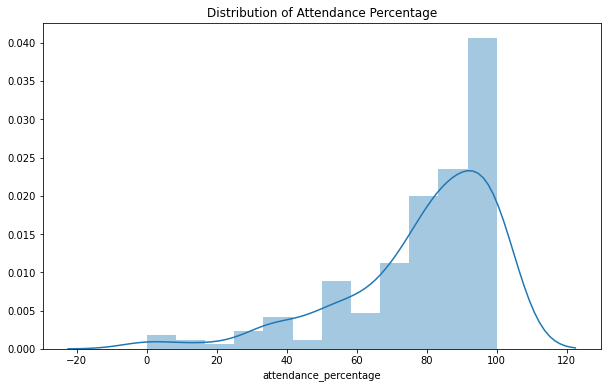

In [115]:
#Histogram of Attendance Percentage for Healthcare workers
plt.figure(figsize = (10, 6)) 
plt.title('Distribution of Attendance Percentage')
ax = sns.distplot(a = hcp_demographics_df['attendance_percentage'], kde = True)
#The distribution is skewed to the left
#Indicating a greater amount of bins under the 90-100 attendance percentage

In [116]:
#Descriptive Info for the quantitative variables of hcps 
hcp_demographics_df.describe()

,completed_shifts,attendance_percentage,Number of Shifts
count,204.000000,204.000000,204.000000
mean,65.176471,78.823529,18.049020
std,82.574154,21.737762,19.954321
min,0.000000,0.000000,1.000000
25%,7.000000,69.750000,3.000000
50%,32.000000,84.000000,11.000000
75%,91.000000,95.250000,27.000000
max,439.000000,100.000000,111.000000


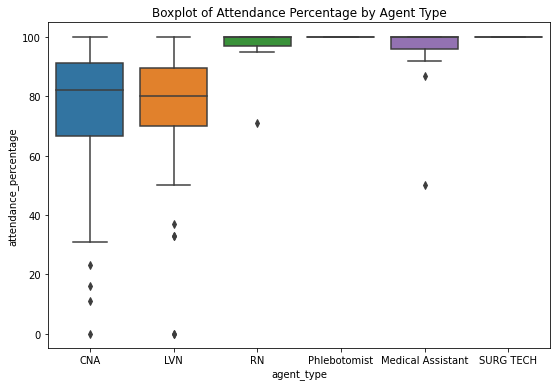

In [117]:
plt.figure(figsize = (9, 6)) 
plt.title('Boxplot of Attendance Percentage by Agent Type')
ax = sns.boxplot(x = hcp_demographics_df['agent_type'], y = hcp_demographics_df['attendance_percentage'], orient = 'v')

Text(0, 0.5, 'HCPs')

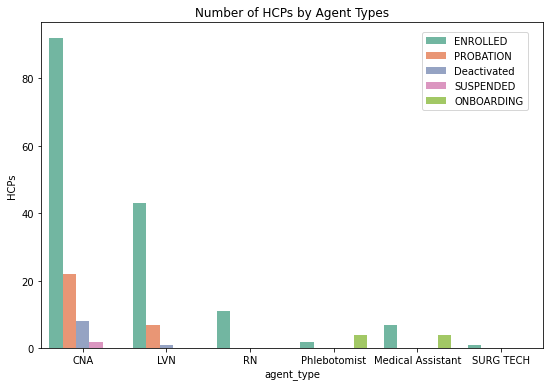

In [118]:
plt.figure(figsize = (9, 6)) 
plt.title('Number of HCPs by Agent Types')
ax = sns.countplot(x='agent_type', data = hcp_demographics_df, palette = 'Set2', hue = 'stage')
ax.legend(loc='center left', bbox_to_anchor=(0.75, 0.85), ncol=1)
plt.ylabel('HCPs')

In [119]:
#Total counts of hcps by agent_type
hcp_demographics_df['agent_type'].value_counts()

CNA                  124
LVN                   51
Medical Assistant     11
RN                    11
Phlebotomist           6
SURG TECH              1
Name: agent_type, dtype: int64

In [120]:
#Looking at breakout of stage for CNAs
hcp_demographics_df[hcp_demographics_df['agent_type'] == 
    'CNA'].groupby('stage')['agent_type'].agg(['count']).reset_index().sort_values(by = 'count', ascending = False)

,stage,count
1,ENROLLED,92
2,PROBATION,22
0,Deactivated,8
3,SUSPENDED,2


In [121]:
#POST-SUBMISSION
#this just counts the number of unique stages, but not the amount of each stage
hcp_demographics_df.groupby('agent_type')['stage'].nunique().to_frame()

,stage
agent_type,
CNA,4
LVN,3
Medical Assistant,2
Phlebotomist,2
RN,1
SURG TECH,1


In [122]:
#POST-SUBMISSION
#Here is the specific breakout of stage by agent_type that corresponds to the graph
hcp_demographics_df.groupby('agent_type')['stage'].value_counts().unstack(fill_value=0)

stage,Deactivated,ENROLLED,ONBOARDING,PROBATION,SUSPENDED
agent_type,,,,,
CNA,8,92,0,22,2
LVN,1,43,0,7,0
Medical Assistant,0,7,4,0,0
Phlebotomist,0,2,4,0,0
RN,0,11,0,0,0
SURG TECH,0,1,0,0,0


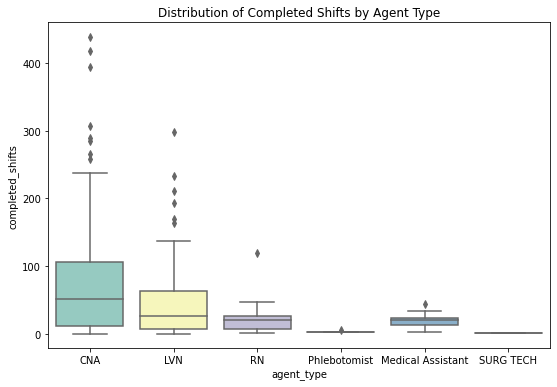

In [123]:
#POST-SUBMISSION
plt.figure(figsize = (9, 6)) 
plt.title('Distribution of Completed Shifts by Agent Type')
ax = sns.boxplot(x = hcp_demographics_df['agent_type'], y = hcp_demographics_df['completed_shifts'], orient = 'v', palette = 'Set3')
#There is a larger range (higher std) for CNAs 
#This is more accurate compared to the completed shifts by agent type by shifts (no duplicates)

In [124]:
#POST-SUBMISSION
hcp_demographics_df.groupby('agent_type')['completed_shifts'].describe().reset_index()

,agent_type,count,mean,std,min,25%,50%,75%,max
0,CNA,124.0,81.322581,91.614121,0.0,11.0,51.5,105.5,439.0
1,LVN,51.0,52.960784,67.936724,0.0,7.5,26.0,63.0,298.0
2,Medical Assistant,11.0,18.727273,12.410406,2.0,12.0,20.0,23.0,44.0
3,Phlebotomist,6.0,2.500000,1.224745,2.0,2.0,2.0,2.0,5.0
4,RN,11.0,26.272727,33.870609,1.0,6.5,20.0,26.5,120.0
5,SURG TECH,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


In [125]:
shift_type_df = merged_shifts_df.groupby(['hcp_id',  'shift_type'])['hcp_id'].agg(['count']).reset_index()
shift_type_df

,hcp_id,shift_type,count
0,5b5635b34afc8f0014a40433,am,11
1,5b6dda6d6ce3150014cc74c6,am,2
2,5b6dda6d6ce3150014cc74c6,noc,9
3,5b6e37ff625376001402de0f,am,6
4,5b6e37ff625376001402de0f,noc,3
...,...,...,...
425,5f4a9a63c682c20016d922cf,am,7
426,5f4bbd29dcab30001604da6a,am,17
427,5f4bbd29dcab30001604da6a,custom,1
428,5f57d0776ed44c001613b1d0,am,8


In [126]:
#POST-SUBMISSION
#Duplicate values for shift_type
shift_type_df = merged_shifts_df.groupby(['hcp_id', 'agent_type','stage', 'completed_shifts', 'shift_type'])['agent_type'].agg(['count']).reset_index()
shift_type_df.rename(columns= {'count' : 'Number of Shifts'}, inplace = True)
shift_type_df

,hcp_id,agent_type,stage,completed_shifts,shift_type,Number of Shifts
0,5b5635b34afc8f0014a40433,CNA,ENROLLED,177,am,11
1,5b6dda6d6ce3150014cc74c6,LVN,PROBATION,32,am,2
2,5b6dda6d6ce3150014cc74c6,LVN,PROBATION,32,noc,9
3,5b6e37ff625376001402de0f,CNA,ENROLLED,188,am,6
4,5b6e37ff625376001402de0f,CNA,ENROLLED,188,noc,3
...,...,...,...,...,...,...
432,5f4a9a63c682c20016d922cf,CNA,PROBATION,1,am,7
433,5f4bbd29dcab30001604da6a,Medical Assistant,ENROLLED,13,am,17
434,5f4bbd29dcab30001604da6a,Medical Assistant,ENROLLED,13,custom,1
435,5f57d0776ed44c001613b1d0,Medical Assistant,ENROLLED,3,am,8


In [127]:
len(shift_type_df['hcp_id'].unique())

200

Text(0, 0.5, 'Shifts')

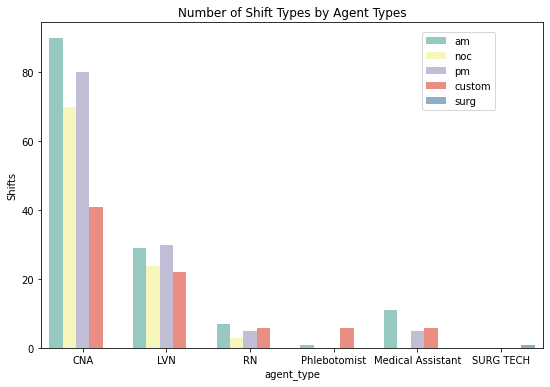

In [128]:
#POST-SUBMISSION
plt.figure(figsize = (9, 6)) 
plt.title('Number of Shift Types by Agent Types')
ax = sns.countplot(x='agent_type', data = shift_type_df, palette = 'Set3', hue = 'shift_type')
ax.legend(loc='center left', bbox_to_anchor=(0.75, 0.85), ncol=1)
plt.ylabel('Shifts')

In [129]:
#Post-submission
shift_type_df.groupby('agent_type')['shift_type'].value_counts().unstack(fill_value=0)
#Fairly even distribution of am, pm, noc for CNA, LVN, RN

shift_type,am,custom,noc,pm,surg
agent_type,,,,,
CNA,90,41,70,80,0
LVN,29,22,24,30,0
Medical Assistant,11,6,0,5,0
Phlebotomist,1,6,0,0,0
RN,7,6,3,5,0
SURG TECH,0,0,0,0,1


In [130]:
#Grouped dataframe of agent_type to get the average charge per hcp_id
charge_df = merged_shifts_df.groupby(['hcp_id',
        'agent_type']).agg({'charge': 'mean'}).reset_index()
charge_df['charge'] = charge_df['charge'].round(2)
charge_df

,hcp_id,agent_type,charge
0,5b5635b34afc8f0014a40433,CNA,29.27
1,5b6dda6d6ce3150014cc74c6,LVN,47.27
2,5b6e37ff625376001402de0f,CNA,32.68
3,5bb684553e5353000430e587,CNA,33.73
4,5be4c820a3acae0004af0833,CNA,31.33
...,...,...,...
199,5f4803b6c0b6bd001607cb17,CNA,29.38
200,5f4a9a63c682c20016d922cf,CNA,27.00
201,5f4bbd29dcab30001604da6a,Medical Assistant,24.00
202,5f57d0776ed44c001613b1d0,Medical Assistant,35.00


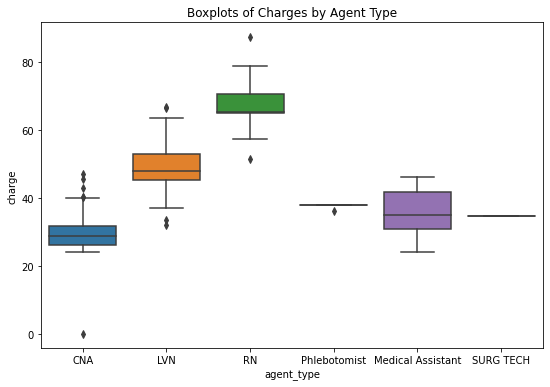

In [131]:
#Distribution of charges by agent_type
plt.figure(figsize = (9, 6)) 
plt.title('Boxplots of Charges by Agent Type')
ax = sns.boxplot(x = charge_df['agent_type'], y = charge_df['charge'], orient = 'v')

In [132]:
charge_df.groupby('agent_type').describe().reset_index()

agent_type charge                                             \
                      count       mean       std    min    25%     50%   
0                CNA  124.0  29.205000  5.258335   0.00  26.00  28.815   
1                LVN   51.0  48.671373  6.961049  32.00  45.16  48.000   
2  Medical Assistant   11.0  35.463636  7.685372  24.00  30.93  35.000   
3       Phlebotomist    6.0  37.700000  0.734847  36.20  38.00  38.000   
4                 RN   11.0  67.422727  9.691243  51.36  65.00  65.190   
5          SURG TECH    1.0  34.670000       NaN  34.67  34.67  34.670   

                   
       75%    max  
0  31.5825  47.06  
1  52.9150  66.64  
2  41.8100  45.98  
3  38.0000  38.00  
4  70.6800  87.33  
5  34.6700  34.67

In [133]:
#Grouping by hcp_id and hcf_id to view all the unique facilities worked by each hcp
hcp_to_hcf_df = merged_shifts_df.groupby(['hcp_id', 'hcf_id'])['hcp_id'].agg(['count'])
hcp_to_hcf_df.head(20)
#The count is the number of shifts per hcf for each hcp
#It is NOT the number of facilities

count
hcp_id                   hcf_id                         
5b5635b34afc8f0014a40433 5e6662c827dbec0016767584     11
5b6dda6d6ce3150014cc74c6 5bd20a2c2f1b850004d0f55e      5
                         5e8dce39ee2690001638ce46      6
5b6e37ff625376001402de0f 5b70ed73e318270014cd6bee      1
                         5bb380e8945fd200046cad4c      2
                         5bd20a2c2f1b850004d0f55e      3
                         5be0b0d2ba64030004d2117c      2
                         5f2ae7490153c70016c840f5      3
5bb684553e5353000430e587 5bb380e8945fd200046cad4c      5
                         5d1f3f99339f36001533f5bb      1
                         5d3f2859dde4300016924963      2
                         5da66dd77f9f550016d77006      1
                         5f0dd8622970920017ea19fe      1
                         5f1869b56145d4001773ec6a      3
                         5f2df9b9dfb6250016bdff3c      2
                         5f305015f8d05400161fa931      9
                         5f360eac17ad7e0016b977c3      3
                         5f3b2d6cf76e09001623f54e      2
                         5f63c06a4c6e0a0016759a7e      1
5be4c820a3acae0004af0833 5cb9f07135163900163f532c     17

In [134]:
#Calculating the number of unique facilities every hcp worker worked at
counts_of_facilities = hcp_to_hcf_df.reset_index().groupby('hcp_id')['hcf_id'].nunique()
facilities_worked_by_hcp = counts_of_facilities.to_frame().reset_index().sort_values(by = 
        'hcf_id', ascending = False)
facilities_worked_by_hcp

,hcp_id,hcf_id
3,5bb684553e5353000430e587,11
48,5d28eef55045480015867762,11
60,5d49feebefc8a400163d30c2,10
54,5d379bdc824c9700160c5e2d,9
168,5efcc6908be2570017d3e29e,9
...,...,...
65,5d65c4bffd1e1b00169dcf43,1
134,5eb1757d9f26d60016395a44,1
133,5eb0a324a133d30016945191,1
132,5eaf38b196ee8400168702f5,1


In [135]:
#POST-SUBMISSION
#Let's see the agent_types of the 2 hcps that work at 11 different facilities
#Maybe they are specialized roles that require working at various facilities
#Both are CNAs. 
merged_shifts_df[merged_shifts_df['hcp_id'] == '5bb684553e5353000430e587']

,shift_id,hcp_id,hcf_id,agent_type,charge,shift_created_at,shift_start,shift_type,is_cancelled,is_verified,stage,hcp_created_at,last_worked,completed_shifts,attendance_percentage
33,5f2dfa20e1bcf700161e1e3f,5bb684553e5353000430e587,5f2df9b9dfb6250016bdff3c,CNA,35.0,08/08,08/08,am,False,True,ENROLLED,03/05,09/20,198,96
34,5f30911834902e001637d138,5bb684553e5353000430e587,5f2df9b9dfb6250016bdff3c,CNA,35.0,08/10,08/10,custom,False,True,ENROLLED,03/05,09/20,198,96
35,5f3764647ec92000166d270f,5bb684553e5353000430e587,5f305015f8d05400161fa931,CNA,35.0,08/15,08/15,pm,False,True,ENROLLED,03/05,09/20,198,96
36,5f3764887ec92000166d2715,5bb684553e5353000430e587,5f305015f8d05400161fa931,CNA,35.0,08/15,08/16,pm,False,True,ENROLLED,03/05,09/20,198,96
37,5f3818576453dc0016b2dd7c,5bb684553e5353000430e587,5f0dd8622970920017ea19fe,CNA,30.0,08/15,08/17,pm,True,False,ENROLLED,03/05,09/20,198,96
38,5f3883512e355a00164bc207,5bb684553e5353000430e587,5f305015f8d05400161fa931,CNA,35.0,08/16,08/18,pm,False,True,ENROLLED,03/05,09/20,198,96
39,5f38836f2db6d00016d6f848,5bb684553e5353000430e587,5f305015f8d05400161fa931,CNA,35.0,08/16,08/20,pm,False,True,ENROLLED,03/05,09/20,198,96
40,5f3aadafc641af0016e4a4de,5bb684553e5353000430e587,5f305015f8d05400161fa931,CNA,35.0,08/17,08/19,pm,False,True,ENROLLED,03/05,09/20,198,96
41,5f3abf67f76e09001623cbc9,5bb684553e5353000430e587,5bb380e8945fd200046cad4c,CNA,24.0,08/17,08/31,pm,False,True,ENROLLED,03/05,09/20,198,96
42,5f3c39191cda500016c42503,5bb684553e5353000430e587,5d3f2859dde4300016924963,CNA,27.0,08/18,09/25,noc,False,False,ENROLLED,03/05,09/20,198,96


In [136]:
merged_shifts_df[merged_shifts_df['hcp_id'] == '5d28eef55045480015867762']

,shift_id,hcp_id,hcf_id,agent_type,charge,shift_created_at,shift_start,shift_type,is_cancelled,is_verified,stage,hcp_created_at,last_worked,completed_shifts,attendance_percentage
757,5efe4f4107513d0017533a7c,5d28eef55045480015867762,5e21d6201fa1af0016d39a5c,CNA,25.0,07/02,07/03,custom,False,True,ENROLLED,07/12,09/21,165,91
758,5f03d198f1d7b6001701de61,5d28eef55045480015867762,5c49f6a0a0ac9600043509e1,CNA,29.0,07/07,07/12,pm,False,True,ENROLLED,07/12,09/21,165,91
759,5f04e2e168380400171fd583,5d28eef55045480015867762,5e8f18c7c2980b00164326a9,CNA,0.0,07/07,07/22,am,True,False,ENROLLED,07/12,09/21,165,91
760,5f0609a6bda90e00171260c6,5d28eef55045480015867762,5c539532fe63b800166ddb2d,CNA,30.0,07/08,07/25,noc,True,False,ENROLLED,07/12,09/21,165,91
761,5f0609d9bda90e00171260db,5d28eef55045480015867762,5c539532fe63b800166ddb2d,CNA,26.0,07/08,07/23,pm,True,False,ENROLLED,07/12,09/21,165,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,5f57e03d5684fc001618bed3,5d28eef55045480015867762,5f3d5962cb28700016dff1a7,CNA,47.0,09/08,09/13,am,False,True,ENROLLED,07/12,09/21,165,91
825,5f57e0636ed44c001613b99f,5d28eef55045480015867762,5f3d5962cb28700016dff1a7,CNA,47.0,09/08,09/14,noc,False,True,ENROLLED,07/12,09/21,165,91
826,5f580b495684fc001618d0c9,5d28eef55045480015867762,5cb9f07135163900163f532c,CNA,31.0,09/08,09/19,noc,False,True,ENROLLED,07/12,09/21,165,91
827,5f580b816ed44c001613cc1b,5d28eef55045480015867762,5cb9f07135163900163f532c,CNA,31.0,09/08,09/21,noc,False,True,ENROLLED,07/12,09/21,165,91


Text(0.5, 0, 'Number of Facilities')

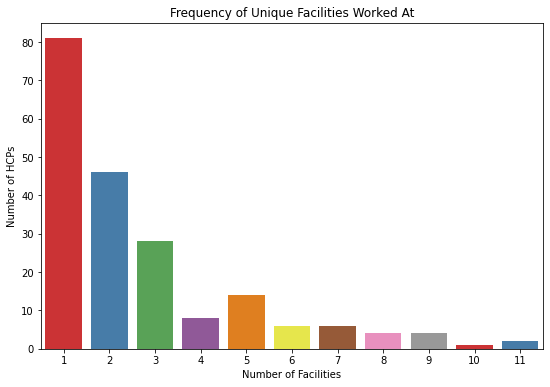

In [137]:
#Plotting frequencies of facilities 
plt.figure(figsize = (9, 6)) 
plt.title('Frequency of Unique Facilities Worked At')
ax = sns.countplot(x='hcf_id', data = facilities_worked_by_hcp, palette = 'Set1')
plt.ylabel('Number of HCPs')
plt.xlabel('Number of Facilities')

In [138]:
facilities_worked_by_hcp['hcf_id'].value_counts()

1     81
2     46
3     28
5     14
4      8
7      6
6      6
9      4
8      4
11     2
10     1
Name: hcf_id, dtype: int64

In [139]:
facilities_worked_by_hcp['hcf_id'].value_counts(normalize = True)

1     0.405
2     0.230
3     0.140
5     0.070
4     0.040
7     0.030
6     0.030
9     0.020
8     0.020
11    0.010
10    0.005
Name: hcf_id, dtype: float64